### Business Case for Building a Predictive Model to Understand Employee Attrition

#### 1. Business Understanding

**1.1 Determine Business Objectives**
The primary objective is to reduce employee attrition rates by understanding the key characteristics that influence why employees leave the firm. High attrition rates can lead to increased recruitment and training costs, loss of organizational knowledge, and reduced employee morale.

**1.2 Assess Situation**
- **Current State:** The firm is experiencing an annual attrition rate of 16%, which is higher than the industry average of 12%.
- **Resources Available:**
  - **Data:** Employee demographics, job roles, tenure, performance ratings, salary information, and exit interviews.
  - **People:** HR team, data analysts, and IT support.
  - **Technology:** Data storage systems, data analysis software, and computing resources.

**1.3 Determine Data Mining Goals**
- Develop a predictive model to identify the factors that contribute to employee attrition.
- Use the model to predict which employees are at a high risk of leaving.
- Provide actionable insights to the HR department to develop targeted retention strategies.

**1.4 Produce Project Plan**
- **Phase 1:** Data Collection and Understanding (2 weeks)
- **Phase 2:** Data Preparation (3 weeks)
- **Phase 3:** Modeling (4 weeks)
- **Phase 4:** Evaluation (2 weeks)
- **Phase 5:** Deployment (3 weeks)
- **Phase 6:** Monitoring and Maintenance (ongoing)

#### 2. Data Understanding

**2.1 Collect Initial Data**
- Gather data from HR databases, including employee demographics, job history, performance reviews, and exit interview feedback.

**2.2 Describe Data**
- Data set includes attributes such as age, gender, education level, job role, tenure, performance rating, salary, and whether the employee has left the firm.

**2.3 Explore Data**
- Use statistical methods and visualization tools to identify patterns and relationships within the data.

**2.4 Verify Data Quality**
- Check for missing values, duplicates, and inconsistencies. Ensure data accuracy and completeness.

#### 3. Data Preparation

**3.1 Select Data**
- Identify relevant attributes such as age, job role, tenure, and performance rating.

**3.2 Clean Data**
- Handle missing values, correct errors, and remove duplicates.

**3.3 Construct Data**
- Create new features if necessary, such as tenure categories or performance trends.

**3.4 Integrate Data**
- Combine data from different sources to create a comprehensive data set.

**3.5 Format Data**
- Organize the data into a structure suitable for modeling, such as a clean and normalized table.

#### 4. Modeling

**4.1 Select Modeling Techniques**
- Choose techniques such as logistic regression, decision trees, and random forests.

**4.2 Generate Test Design**
- Split data into training and test sets to evaluate model performance.

**4.3 Build Model**
- Apply selected modeling techniques to the training data to build the predictive models.

*Models Built*
1. Logistic Regression Model
2. Discriminant Analysis
  Linear and Quadratic
3. Desccision Tree
4. Random Forest
5. XGBoost

**4.4 Assess Model**
- Evaluate model performance using metrics such as accuracy, precision, recall, and ROC-AUC.

#### 5. Evaluation

**5.1 Evaluate Results**
- Assess the model's performance in predicting employee attrition. Ensure it meets the business objectives.

**5.2 Review Process**
- Review all steps taken to ensure they align with the goals and that the methodology was correctly applied.

**5.3 Determine Next Steps**
- Decide whether to proceed with model deployment, make adjustments to the model, or conduct further iterations.

#### 6. Deployment

**6.1 Plan Deployment**
- Develop a strategy to integrate the predictive model into the HR systems for ongoing use.

**6.2 Monitor and Maintain**
- Set up regular monitoring to track the model’s performance and update it as necessary.

**6.3 Review Project**
- Conduct a final review to document the project’s successes and areas for improvement.

**6.4 Produce Final Report**
- Create a detailed report summarizing the project, including findings, model performance, and recommendations.




### Package Imports

In [344]:
# -*- coding: utf-8 -*-
"""
Created on Thu June 15 17:37:49 2024

@author: Sumaila
"""

# Libraries

import pandas as pd
# Needed for data i/o
import numpy as np
# Needed for linear algebra operations
import pickle
# Needed for model export
import seaborn as sns
# Needed for data visualisation
from scipy.stats import ttest_ind,randint
# Needed for T-test
import matplotlib.pyplot as plt
# Needed for data visualisation
from PIL import Image, ImageDraw, ImageFont
# Needed for text to image conversion
from sklearn import tree
# Needed for decision tree
from sklearn.linear_model import LogisticRegression
# Needed for logistic regression
from sklearn.ensemble import RandomForestClassifier
# Needed for random forest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Needed for discriminant analysis
from imblearn.over_sampling import SMOTE
# TODO: Why do we need this.
from sklearn.model_selection import train_test_split
# TODO: Why do we need this.
from sklearn.metrics import precision_score, recall_score, f1_score
# TODO: Why do we need this.
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Needed for decision tree
from sklearn.model_selection import train_test_split
# Needed for train-test split
from sklearn.preprocessing import MinMaxScaler
# Needed for feature scaling
from sklearn.preprocessing import StandardScaler
# Needed for Data Preprocessing. ie: Standardized Scaling
from sklearn.metrics import confusion_matrix
# Needed for confusion matrix. ie: model accuracy
from sklearn.metrics import classification_report
# Needed for classification report. ie: precision, recall, f1-score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Needed for parameterization. ie. determining the best set of parameters
# that optimizes the model outcome.
from scipy import stats
# Needed for Chi Squared test
from sklearn import metrics
# Needed for model evaluation
from sklearn.model_selection import cross_val_score
# Needed for model cross validation.
import warnings
warnings.filterwarnings('ignore')
# Needed for ignoring warnings

import xgboost as xgb
from xgboost import XGBClassifier
import os
import matplotlib.colors as mcolors

### Functions

In [345]:
# Functions

# This is needed for converting the text outputs into images.
def text_to_image(text1, text2, font_path=None, font_size=20):
    # Combine the two text inputs
    combined_text = text1.strip() + "\n\n" + text2.strip()

    lines = combined_text.split('\n')
    max_width = max([len(line) for line in lines])
    width = max_width * (font_size // 2)
    height = len(lines) * font_size * 1.5

    image = Image.new('RGB', (int(width), int(height)), color='white')
    draw = ImageDraw.Draw(image)

    if font_path:
        font = ImageFont.truetype(font_path, font_size)
    else:
        font = ImageFont.load_default()

    y_text = 0
    for line in lines:
        text_width = draw.textlength(line, font=font) # Get the width of the text
        draw.text(((text_width // 2) - 10, y_text), line, font=font, fill='black')
        y_text += font_size * 1.5 # Estimate height based on font size

    return image



# This is needed to plot all the continiuous variables whiles saving the image in google drive
def plot_continuous_variables(
        df, 
        predictive_variable, 
        continuous_variable, 
        predictive_variable_value_0, 
        predictive_variable_value_1, 
        image_file_name
        ):
    x1 = list(df[df[predictive_variable] == predictive_variable_value_0][continuous_variable])
    x2 = list(df[df[predictive_variable] == predictive_variable_value_1][continuous_variable])

    plt.figure(figsize=(12, 4))
    sns.set_context('paper', font_scale=1.2)

    plt.hist([x1, x2], bins=40, density=False, color=['#ff9999','#66b3ff'])
    plt.legend(['No', 'Yes'], title='Attrition', loc='upper right', facecolor='white')
    plt.xlabel(f'{continuous_variable}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {continuous_variable} by Attrition Status', size=30)
    plt.box(False)
    save_path = f'{image_file_name}'
    plt.savefig(save_path)


# This is needed to plot all a correlation matrix for the continuous variables whiles saving the image in google drive
def correlation_matrix(
        df, 
        image_file_name
    ):
  correlation = df.select_dtypes(include=["int64", "float64"]).corr()  
  f, ax = plt.subplots(figsize=(20, 10))
  sns.heatmap(correlation, cbar=True, square=True, annot=False, fmt='.1f',
            xticklabels=True, yticklabels=True
            , cmap="coolwarm", linewidths=.5, ax=ax)
  plt.title('CORRELATION MATRIX - HEATMAP', size=18)
  save_path = f'{image_file_name}'
  plt.savefig(save_path)




def data_import(
        File_name
    ):
  df = pd.read_csv(File_name)
  data = df
  return data




def evaluate_model_with_cv(
        model, 
        X_train, 
        y_train, 
        y_test, 
        y_pred, 
        target_names, 
        image_file='classification_report.png', 
        chart_name = ""
    ):
    """
    Evaluates a classification model using 5-fold CV and classification report,
    and generates a styled image summary.
    """
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    avg_cv = np.mean(cv_scores)
    std_cv = np.std(cv_scores)

    # Classification report
    report = classification_report(y_test, y_pred, target_names=target_names)

    # Prepare text content
    summary_text = f"5-Fold CV Avg: {avg_cv:.4f} | Std Dev: {std_cv:.4f}"
    report_lines = report.strip().split('\n')
    
    # Plot setup
    plt.figure(figsize=(10, 6))
    plt.axis('off')
    plt.gca().set_facecolor('#ecf0f1')
    
    # Fonts
    title_font = {'fontsize': 15, 'fontweight': 'bold', 'color': '#2c3e50'}
    text_font = {'fontsize': 11, 'color': '#34495e', 'family': 'monospace'}

    # Header
    plt.text(0.5, 1.02, f'{chart_name}', ha='center', **title_font)
    plt.text(0.5, 0.97, summary_text, ha='center', fontsize=11, color='#16a085')

    # Classification report
    y_pos = 0.88
    for line in report_lines:
        plt.text(0.01, y_pos, line, ha='left', **text_font)
        y_pos -= 0.045

    # Save and close
    plt.tight_layout()
    plt.savefig(image_file, dpi=300, bbox_inches='tight', facecolor='#ecf0f1')
    plt.close()




def plot_confusion_matrix(
        y_true, 
        y_pred, 
        labels=None, 
        display_labels=None,
        title="Confusion Matrix", 
        image_file="confusion_matrix.png",
        figsize=(4, 3), 
        cmap="Blues"):
    """
    Plots and saves a confusion matrix heatmap.

    Parameters:
    - y_true: Actual target labels
    - y_pred: Predicted labels
    - labels: Class values to use for the confusion matrix
    - display_labels: Custom labels to show on the axes (e.g., class names)
    - title: Title of the plot
    - image_file: Filename to save the plot
    - figsize: Tuple for figure size
    - cmap: Colormap for heatmap
    """
    if labels is None:
        labels = sorted(list(set(y_true) | set(y_pred)))

    if display_labels is None:
        display_labels = labels

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap,
                xticklabels=display_labels,
                yticklabels=display_labels)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.tight_layout()

    plt.savefig(image_file)
    plt.close()



def visualize_decision_tree(
    model,
    feature_names=None,
    class_names=None,
    max_depth=None,
    figsize=(20, 10),
    image_file="figure 1.png",
    model_name=""
):
    """
    Visualizes a decision tree using matplotlib, with optional depth trimming.
    
    Parameters:
    - model: trained DecisionTreeClassifier or DecisionTreeRegressor
    - feature_names: list of feature names (optional)
    - class_names: list of class names (for classification)
    - max_depth: maximum depth to display in the plot (optional)
    - figsize: size of the figure
    - image_file: filename to save the image as PNG
    """
    plt.figure(figsize=figsize)

    plot_tree(
        model,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=10,
        max_depth=max_depth,
        impurity=False,
        proportion=True
    )
    plt.title(f"Decision Tree Visualization({model_name})")
    plt.savefig(image_file)


def plot_top_features(
        model, 
        feature_names, 
        model_type='tree', 
        top_n=10, 
        save_path='top_features.png', 
        model_name =""
    ):
    """
    Creates and saves an image of the top N features by importance or coefficient value.

    Parameters:
        model: Trained model (e.g., RandomForest or LogisticRegression).
        feature_names: List of feature names corresponding to model input.
        model_type: Type of model - 'tree' or 'logistic'.
        top_n: Number of top features to display.
        save_path: Path where the image will be saved.
    """
    
    if model_type == 'tree':
        if not hasattr(model, 'feature_importances_'):
            raise AttributeError("The model does not have 'feature_importances_'. Did you choose the correct model_type?")
        importances = model.feature_importances_
        importances_label = "Importance"

    elif model_type == 'logistic':
        if not hasattr(model, 'coef_'):
            raise AttributeError("The model does not have 'coef_'. Did you choose the correct model_type?")
        # Flatten and take absolute values for importance ranking
        importances = np.abs(model.coef_.ravel())
        importances_label = "Coefficient Magnitude"

    else:
        raise ValueError("model_type must be either 'tree' or 'logistic'")

    # Create DataFrame
    feat_df = pd.DataFrame({
        'Feature': feature_names,
        importances_label: importances
    })

    # Sort and select top N
    top_feats = feat_df.sort_values(by=importances_label, ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(top_feats['Feature'][::-1], top_feats[importances_label][::-1], color='skyblue')
    plt.xlabel(importances_label)
    plt.title(f'Top {top_n} Features ({model_name.title()})')
    plt.tight_layout()
    
    # Save plot
    plt.savefig(save_path, dpi=300)
    plt.close()
  

def evaluate_model(
        model, 
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        save_path='metrics_output.png', 
        model_name=""
    ):
    """
    Trains and evaluates a Logistic Regression model, and saves the evaluation metrics as a styled image.

    Parameters:
        model: A scikit-learn LogisticRegression instance.
        X_train, y_train: Training data.
        X_test, y_test: Testing data.
        save_path: Path to save the output image.
        model_name: Custom name for the model to show in the image.
    """
    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Prepare metrics dictionary
    metrics = {
        "Model": model_name,
        "Training Score": train_score,
        "Test Score": test_score,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Create a modern styled image
    plt.figure(figsize=(8, 5))
    plt.axis('off')

    # Styling
    title_font = {'fontsize': 16, 'fontweight': 'bold', 'color': '#2c3e50'}
    text_font = {'fontsize': 13, 'color': '#34495e'}

    # Title
    plt.text(0.5, 0.85, metrics["Model"], ha='center', **title_font)

    # Display each metric line by line
    spacing = 0.70
    for k in list(metrics.keys())[1:]:
        plt.text(0.5, spacing, f"{k}: {metrics[k]:.2f}", ha='center', **text_font)
        spacing -= 0.10

    # Background color
    plt.gca().set_facecolor('#ecf0f1')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='#ecf0f1')
    plt.close()

    return Image.open(save_path), y_pred


def visualize_tree_from_forest(
        rf_model, 
        feature_names=None, 
        class_names=None, 
        tree_index=0, 
        max_depth=3, 
        figsize=(20, 10), 
        save_path="figure.png", 
        model_name = ""
    ):
    """
    Visualizes a single decision tree from a RandomForestClassifier.
    
    Parameters:
    - rf_model: trained RandomForestClassifier object
    - feature_names: list of feature names (default: None)
    - class_names: list of class labels (default: None)
    - tree_index: index of the tree to visualize (default: 0)
    - max_depth: depth to limit tree rendering for clarity (default: 3)
    - figsize: size of the plot (default: (20, 10))
    """
    estimator = rf_model.estimators_[tree_index]
    
    plt.figure(figsize=figsize)
    plot_tree(
        estimator,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        max_depth=max_depth,
        fontsize=10,
        impurity=False,
        proportion=True
    )
    plt.title(f"Decision Tree #{tree_index} from the Random Forest ({model_name.title()})")
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='#ecf0f1')
    plt.show()




def chi_square_analysis_plot(
        df, 
        target_col='Attrition', 
        categorical_variables=None,
        output_folder='images', 
        initial_fig_num='2.2'
    ):
    """
    Performs Chi-square tests between categorical variables and the target,
    and saves styled plots with interpretation and visual enhancements.
    """
    os.makedirs(output_folder, exist_ok=True)

    if categorical_variables is None:
        categorical_variables = df.select_dtypes(include=['object', 'category']).columns.tolist()

    major, minor = map(int, initial_fig_num.split('.'))

    for col in categorical_variables:
        cross_tab = pd.crosstab(df[col], df[target_col])
        chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

        fig, axs = plt.subplots(2, 2, figsize=(14, 10))
        fig.patch.set_facecolor('#ECEFF1')
        fig.suptitle(f"Chi-Square Analysis – {col} vs {target_col}",
                     fontsize=20, weight='bold', color='#263238', y=1.02)

        # Normalize for coloring
        norm_obs = cross_tab.values / cross_tab.values.max()
        norm_exp = expected / expected.max()

        # Observed values table
        axs[0, 0].axis('off')
        axs[0, 0].set_title("Observed Frequencies", fontsize=15, color='#37474F')
        table1 = axs[0, 0].table(cellText=cross_tab.values,
                                 rowLabels=cross_tab.index,
                                 colLabels=cross_tab.columns,
                                 loc='center')
        table1.set_fontsize(13)
        for (i, j), cell in table1.get_celld().items():
            if i == 0 or j == -1:  # Header or row label
                cell.set_text_props(weight='bold', color='#263238')
                cell.set_facecolor('#CFD8DC')
            else:
                color = plt.cm.Blues(norm_obs[i-1, j])
                cell.set_facecolor(color)
                cell.set_text_props(color='black')

        # Expected values table
        axs[0, 1].axis('off')
        axs[0, 1].set_title("Expected Frequencies", fontsize=15, color='#37474F')
        table2 = axs[0, 1].table(cellText=np.round(expected, 2),
                                 rowLabels=cross_tab.index,
                                 colLabels=cross_tab.columns,
                                 loc='center')
        table2.set_fontsize(13)
        for (i, j), cell in table2.get_celld().items():
            if i == 0 or j == -1:
                cell.set_text_props(weight='bold', color='#263238')
                cell.set_facecolor('#CFD8DC')
            else:
                color = plt.cm.Greens(norm_exp[i-1, j])
                cell.set_facecolor(color)
                cell.set_text_props(color='black')

        # Summary and interpretation
        axs[1, 0].axis('off')
        significance = "Statistically Significant (p < 0.05)" if p_val < 0.05 else "Not Significant (p ≥ 0.05)"
        summary_text = (
            f"Chi² Statistic: {chi2_stat:.4f}\n"
            f"Degrees of Freedom: {dof}\n"
            f"P-Value: {p_val:.4f}\n\n"
            f"Interpretation: {significance}"
        )
        axs[1, 0].text(0.5, 0.5, summary_text, ha='center', va='center',
                       fontsize=15, color='#37474F')

        axs[1, 1].axis('off')

        # Save figure
        filename = f"figure {major}.{minor}.png"
        save_path = os.path.join(output_folder, filename)
        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
        plt.close()

        minor += 1



def t_test_analysis_plot(
        df, 
        target_col='Attrition', 
        numerical_variables=None,
        output_folder='t_test_outputs', 
        initial_fig_num='2.1'
    ):
    """
    Performs t-tests for numerical variables between target classes and saves output as centered, modern images.
    """
    os.makedirs(output_folder, exist_ok=True)

    if numerical_variables is None:
        numerical_variables = df.select_dtypes(include=[np.number]).columns.tolist()
        numerical_variables = [col for col in numerical_variables if col != target_col]

    major, minor = map(int, initial_fig_num.split('.'))

    for col in numerical_variables:
        x1 = df[df[target_col] == 0][col].dropna()
        x2 = df[df[target_col] == 1][col].dropna()

        t_statistic, p_value = ttest_ind(x1, x2)

        # Create figure
        fig, ax = plt.subplots(figsize=(10, 6))
        fig.patch.set_facecolor('#ECEFF1')
        ax.axis('off')

        # Centered title
        ax.text(0.5, 0.85, f"T-Test Results – {col}", ha='center', fontsize=20, weight='bold', color='#263238')

        # Centered content
        content_lines = [
            f"Feature: {col}",
            f"T-Statistic: {t_statistic:.4f}",
            f"P-Value: {p_value:.4f}",
            f"Sample Size Group 0: {len(x1)}",
            f"Sample Size Group 1: {len(x2)}"
        ]

        for i, line in enumerate(content_lines):
            y = 0.65 - i * 0.08
            ax.text(0.5, y, line, ha='center', fontsize=15, color='#37474F')

        # Save figure
        filename = f"figure {major}.{minor}.png"
        save_path = os.path.join(output_folder, filename)
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
        plt.close()

        minor += 1


### Data Import

In [346]:
# Call the data import function and save the data as df and df_copy
df = data_import('HR data.csv')

### Check for Count of missing values in the data

In [347]:
# Checking for missing values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Check for data type

In [348]:
# Checking for variable type
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel            object
TotalWorkingYears   

### Check for data type of each feature

In [349]:
# Checking for variable type
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel            object
TotalWorkingYears   

### Convert all numberical variables to int64 and all categorical variables to category from object. 

In [350]:
 # List of categorical variables
categorical_variables = list(df.select_dtypes(include=['object']).columns)

# List of numerical variables
numerical_variables = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Set the data type of the all categorical and numerical variables
for i in categorical_variables:
    df[i] = df[i].astype("category")


for j in numerical_variables:
    df[j] = df[j].astype("int64")

del[i, j]

### Sanity Check for the previous operation

In [351]:
# Inspect the data types
df.dtypes

Age                            int64
Attrition                      int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours                  int64
S

# Exploratory  Data Analysis

### Univariate Exploratory Analysis for the categorical variables. 


In [352]:
for i in categorical_variables:
  print("============================")
  print(df[i].value_counts())
  print("============================")


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
Education
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: count, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
EnvironmentSatisfaction
High         453
Very High    446
Medium       287
Low          284
Name: count, dtype: int64
Gender
Male      882
Female    588
Name: count, dtype: int64
JobInvolvement
High         868
Medium       375
Very High    144
Low           83
Name: count, dtype: int64
JobLevel
Very Low     543
Low          534
Medium       218
High         106
Very High     69
Name: count, dtype: int64
JobRole
Sales Execut

### Univariate Exploratory Analysis for the numerical variables. 


In [353]:
# Basic Exploratory Data Analysis for categorical variables

for i in categorical_variables:
    print("============================")
    print(df[i].value_counts())
    print("============================")

# Basic Exploratory Data Analysis for Continuous variables
for j in numerical_variables:
    print("============================")
    print(df[j].describe())
    print("============================")
del[i, j]

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
Education
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: count, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
EnvironmentSatisfaction
High         453
Very High    446
Medium       287
Low          284
Name: count, dtype: int64
Gender
Male      882
Female    588
Name: count, dtype: int64
JobInvolvement
High         868
Medium       375
Very High    144
Low           83
Name: count, dtype: int64
JobLevel
Very Low     543
Low          534
Medium       218
High         106
Very High     69
Name: count, dtype: int64
JobRole
Sales Execut

### Plot the Response variable 

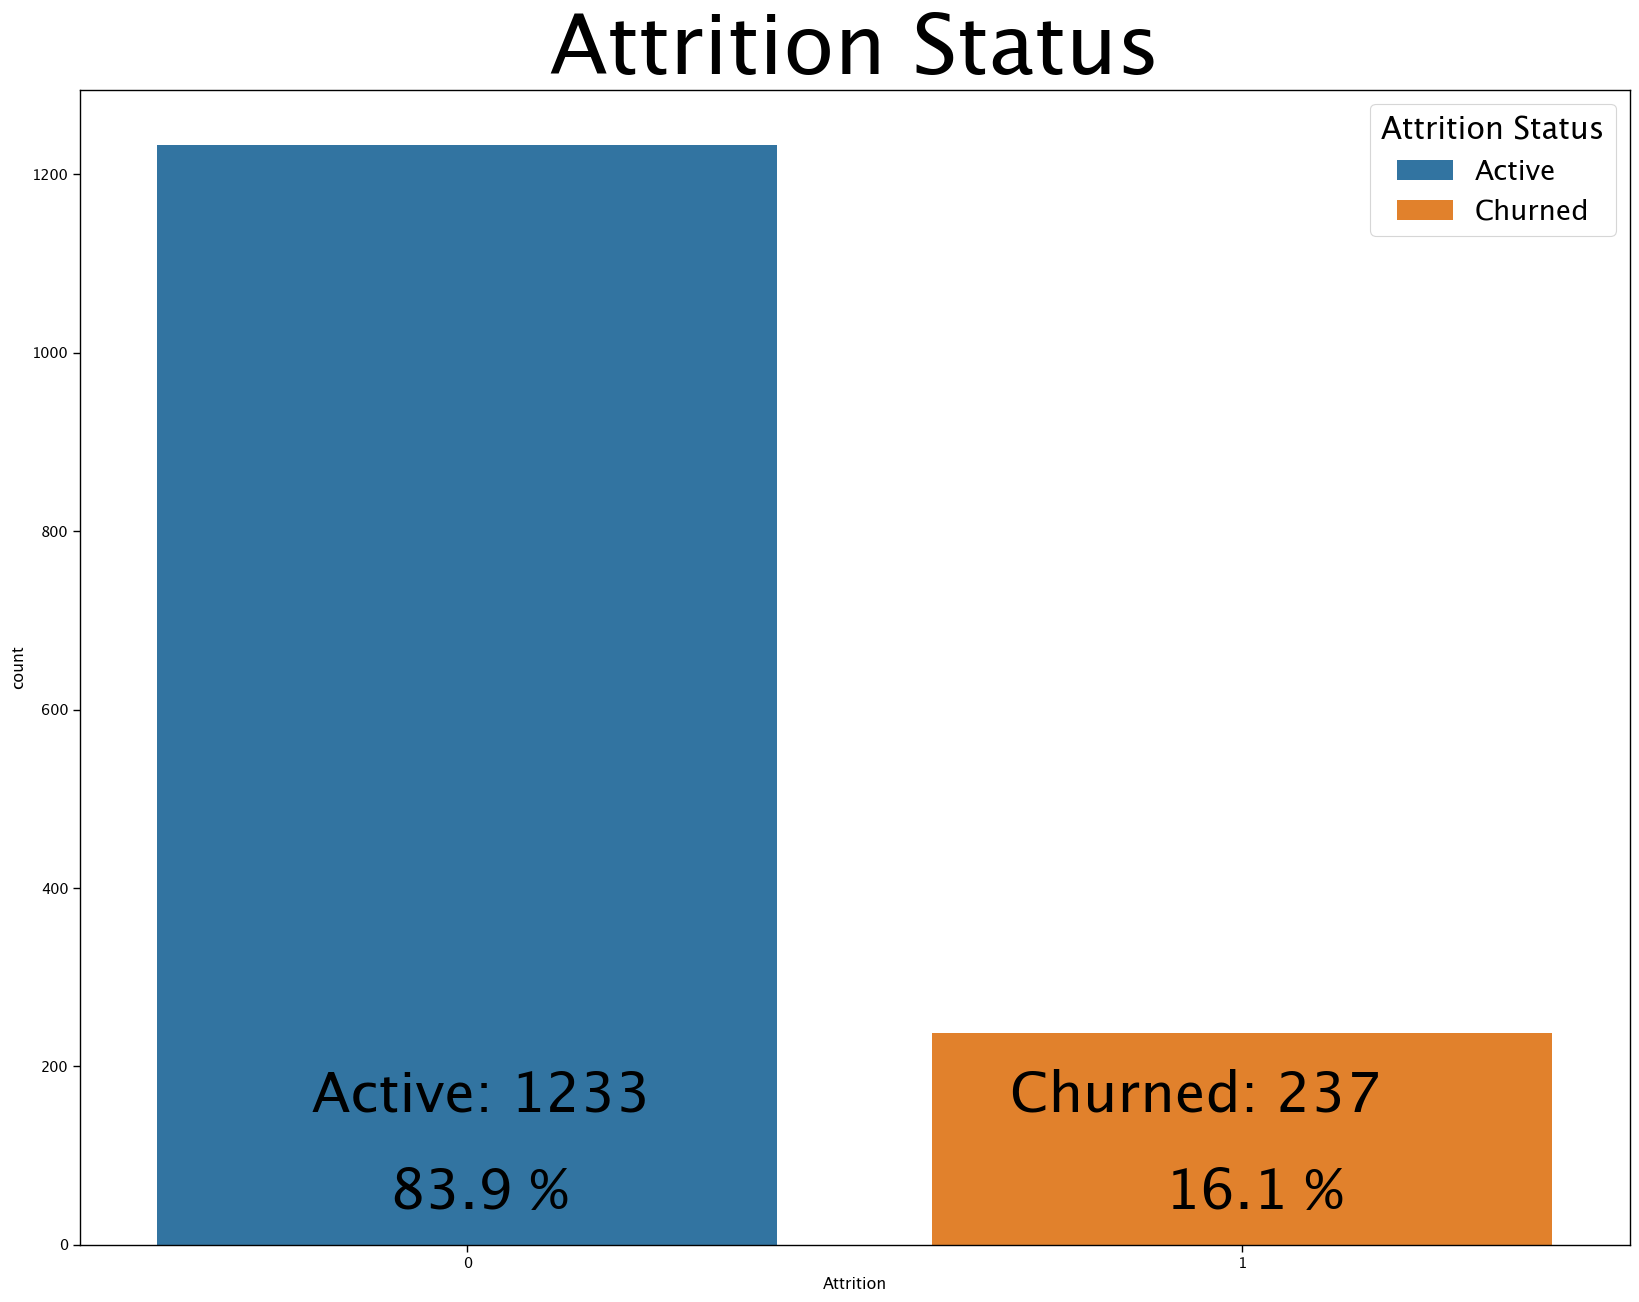

In [354]:
# Exploratory Data Analysis
target = df.Attrition

churned = target.sum()
active = len(target) - churned

Percentage_churned = round((churned / len(target)) * 100, 1)
Percentage_active = round((active / len(target)) * 100, 1)

# Custom legend labels
custom_labels = ['Active', 'Churned']  # Customize this

# Distribution of target variable
plt.figure(figsize=(20, 15))
sns.set_context('paper', font_scale=1.2)

plot = sns.countplot(x='Attrition', data=df, palette=['#1F77B4', '#FF7F0E'], hue='Attrition')

# Replace legend text
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=custom_labels, title='Attrition Status', fontsize=20, title_fontsize=22)

# Annotations
plt.annotate('Active: {}'.format(active), xy=(-0.3, 150), xytext=(-0.2, 150), size=40)
plt.annotate('Churned: {}'.format(churned), xy=(0.7, 150), xytext=(0.7, 150), size=40)
plt.annotate(str(Percentage_active) + " %", xy=(-0.3, 15), xytext=(-0.1, 40), size=40)
plt.annotate(str(Percentage_churned) + " %", xy=(0.7, 15), xytext=(0.9, 40), size=40)

plt.title('Attrition Status', size=60)

# Save plot
image_file = 'images/figure 1.1.png'
plt.savefig(image_file)

# Clean up
del [active, churned, Percentage_active, Percentage_churned, target]


### Plot of the categorical Variables Part 1


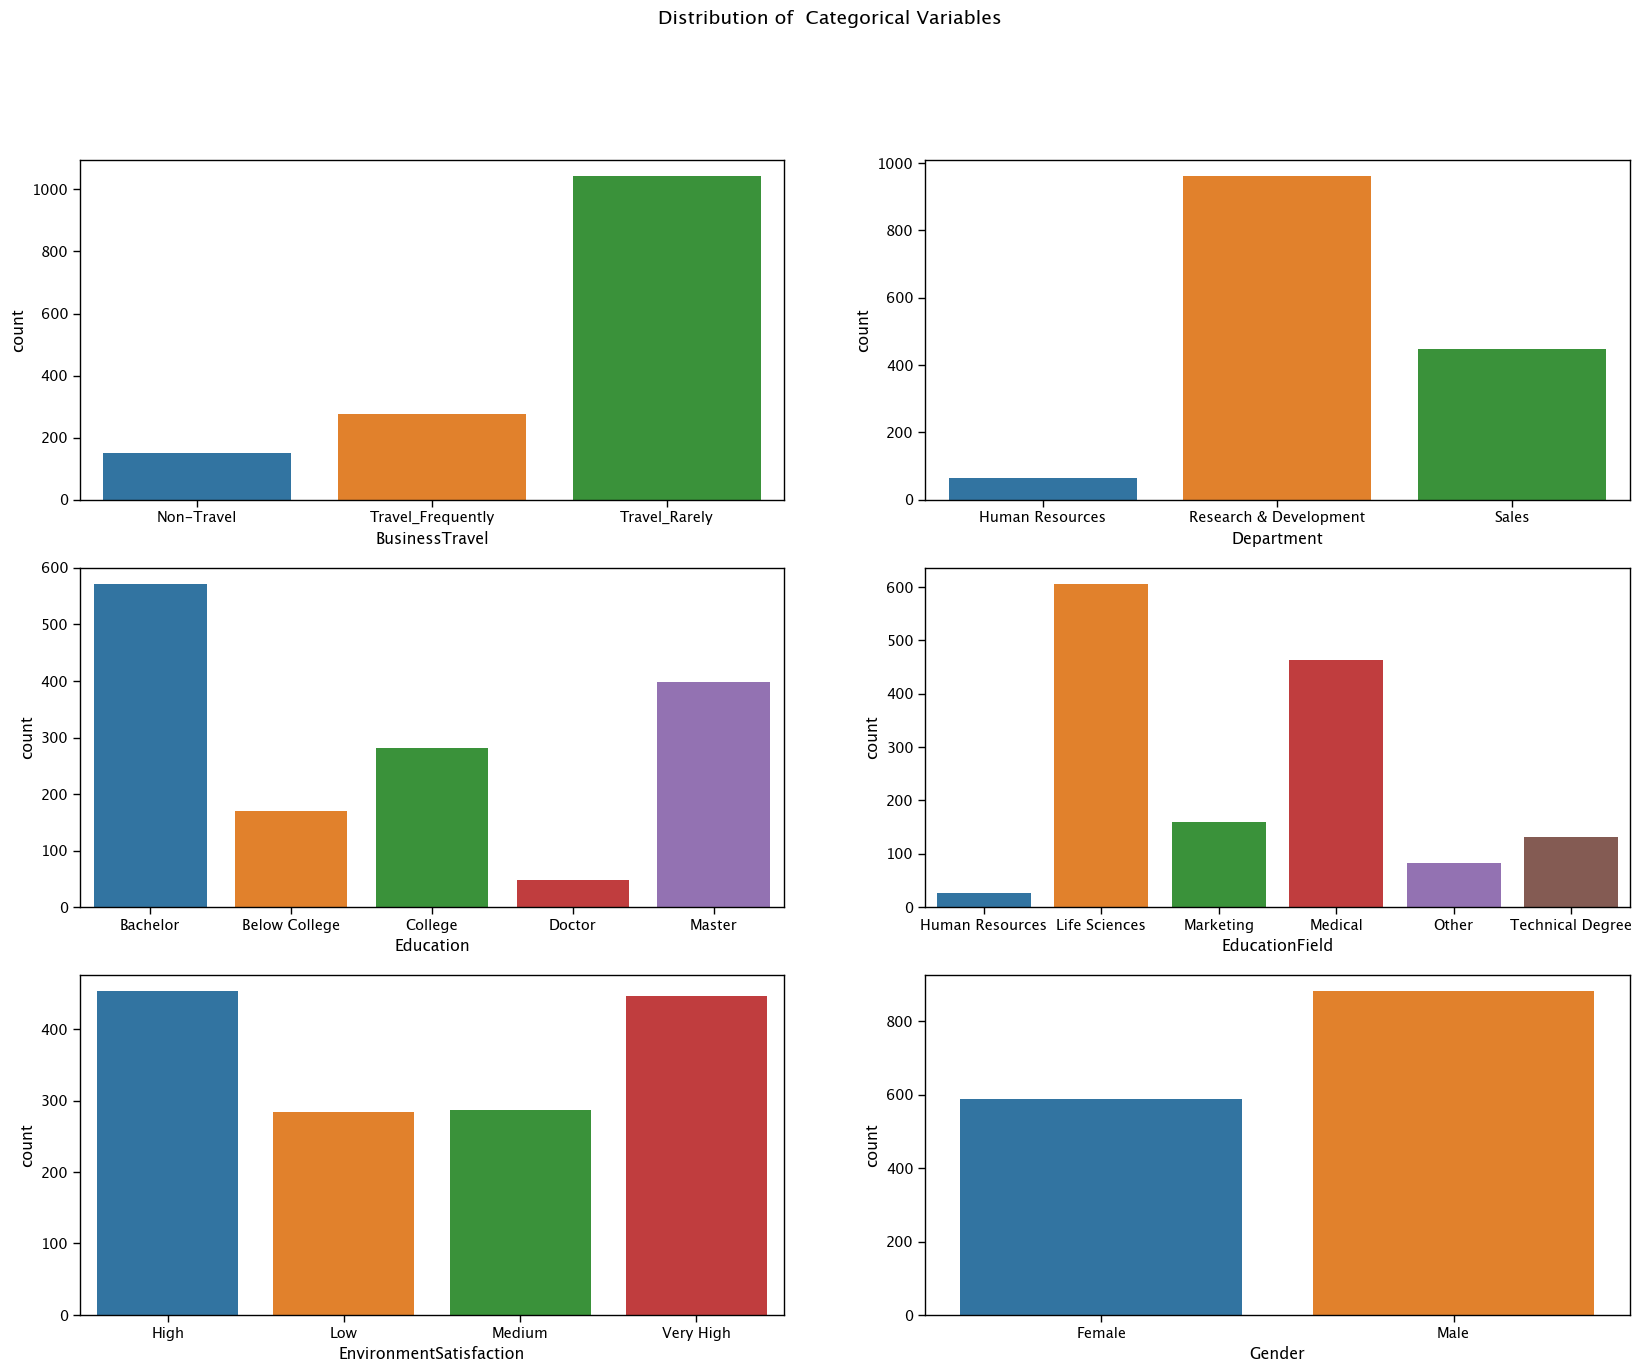

In [355]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15), facecolor='white')
fig.suptitle('Distribution of  Categorical Variables')

ax = sns.countplot(x="BusinessTravel", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C'],hue="BusinessTravel", ax=axes[0, 0])
ax1 = sns.countplot(x="Department", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C'],hue="Department", ax=axes[0, 1])
ax2 = sns.countplot(x="Education", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'],hue="Education", ax=axes[1, 0])
ax3 = sns.countplot(x="EducationField", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B'],hue="EducationField", ax=axes[1, 1])
ax4 = sns.countplot(x="EnvironmentSatisfaction", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'],hue="EnvironmentSatisfaction", ax=axes[2, 0])
ax5 = sns.countplot(x="Gender", data=df, palette=['#1F77B4', '#FF7F0E'],hue="Gender", ax=axes[2, 1])
image_file = 'Images/figure 1.2.png'
save_path = f'{image_file}'
plt.savefig(save_path)

# %%


### Plot of the categorical Variables Part 2

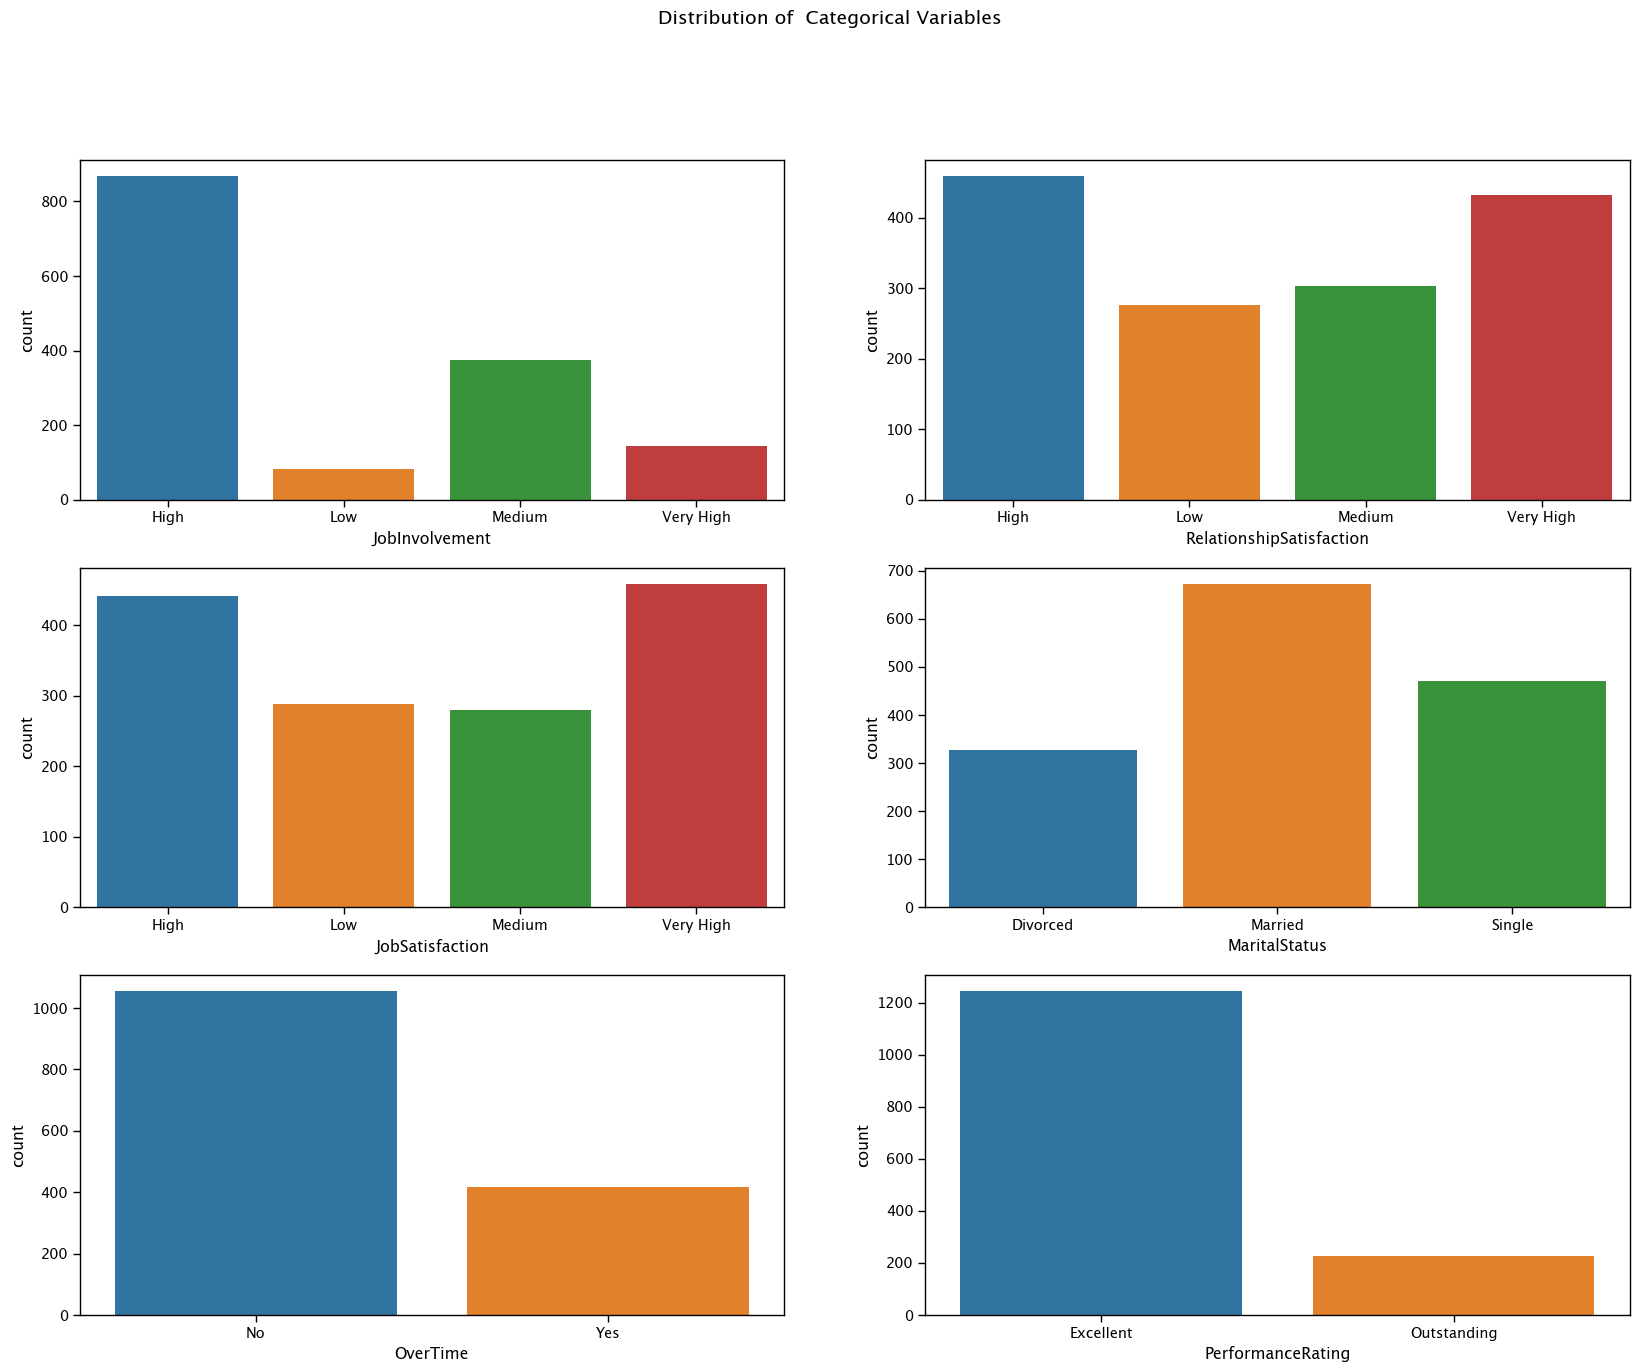

In [356]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15), facecolor='white')
fig.suptitle('Distribution of  Categorical Variables')

ax = sns.countplot(x="JobInvolvement", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'],hue = "JobInvolvement", ax=axes[0, 0])
ax1 = sns.countplot(x="RelationshipSatisfaction", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'],hue = "RelationshipSatisfaction", ax=axes[0, 1])
ax2 = sns.countplot(x="JobSatisfaction", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'],hue = "JobSatisfaction", ax=axes[1, 0])
ax3 = sns.countplot(x="MaritalStatus", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C'],hue = "MaritalStatus", ax=axes[1, 1])
ax4 = sns.countplot(x="OverTime", data=df, palette=['#1F77B4', '#FF7F0E'],hue = "OverTime", ax=axes[2, 0])
ax5 = sns.countplot(x="PerformanceRating", data=df, palette=['#1F77B4', '#FF7F0E'],hue = "PerformanceRating", ax=axes[2, 1])
image_file = 'images/figure 1.3.png'
save_path = f'{image_file}'
plt.savefig(save_path)

### Plot of the categorical Variables Part 3


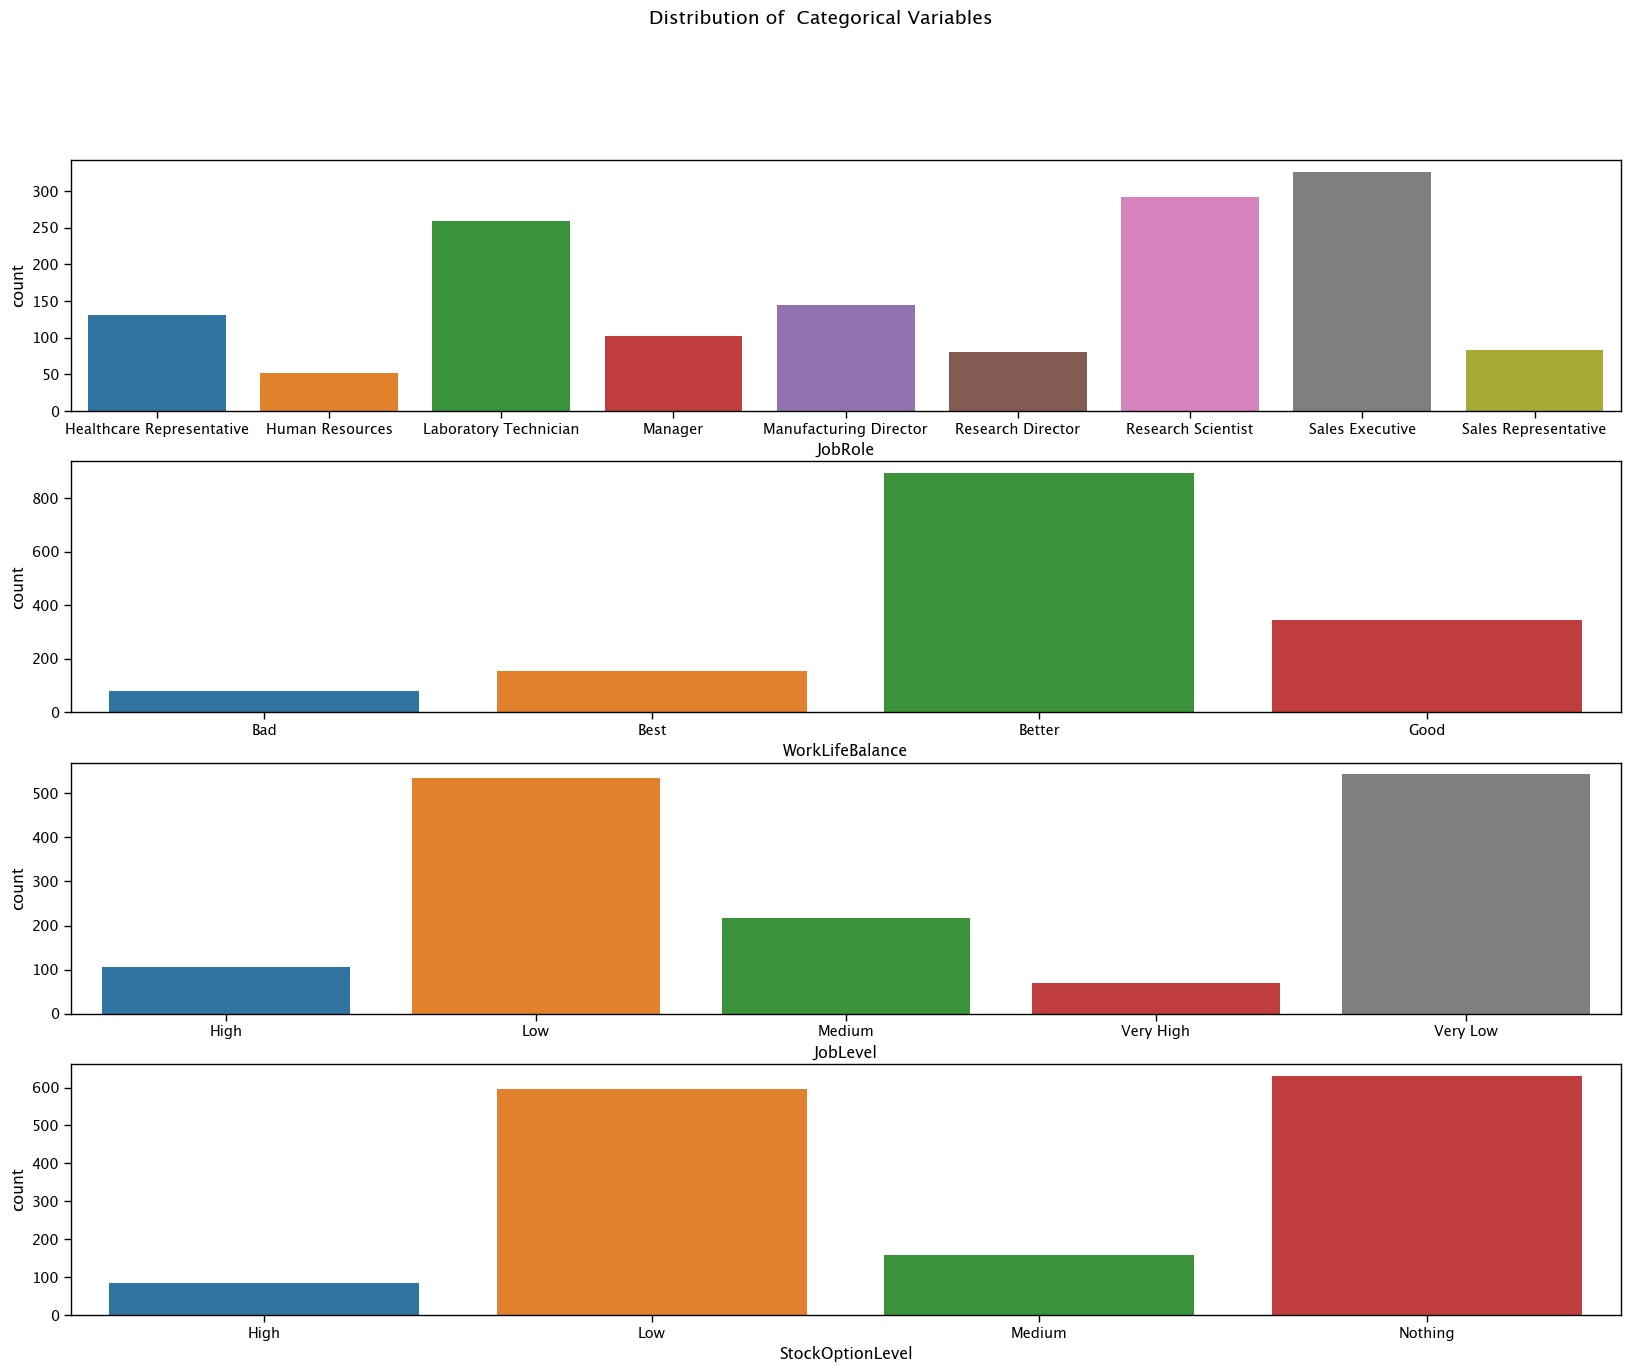

In [357]:
fig, axes = plt.subplots(4, figsize=(20, 15), facecolor='white')
fig.suptitle('Distribution of  Categorical Variables')

ax = sns.countplot(x="JobRole", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22'],hue = "JobRole", ax=axes[0])
ax1 = sns.countplot(x="WorkLifeBalance", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'],hue = "WorkLifeBalance", ax=axes[1])
ax2 = sns.countplot(x="JobLevel", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728','#7F7F7F'],hue = "JobLevel", ax=axes[2])
ax3 = sns.countplot(x="StockOptionLevel", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'],hue = "StockOptionLevel", ax=axes[3])

image_file = 'images/figure 1.4.png'
save_path = f'{image_file}'
plt.savefig(save_path)

### Plot of the numerical variables


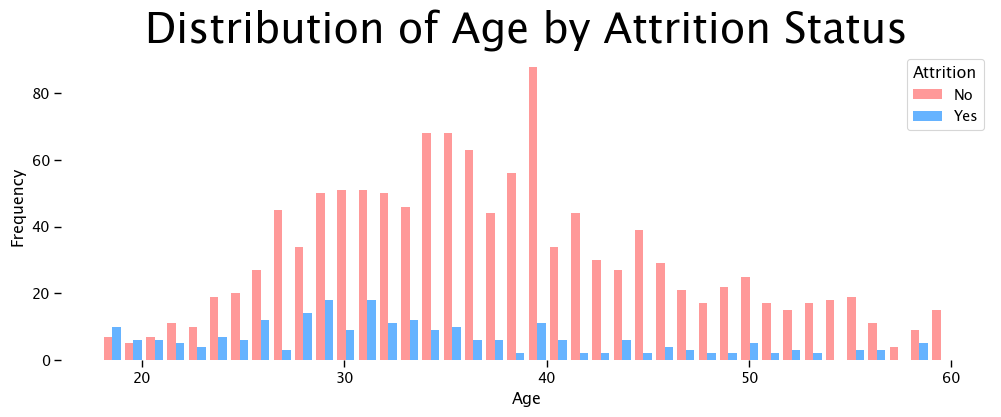

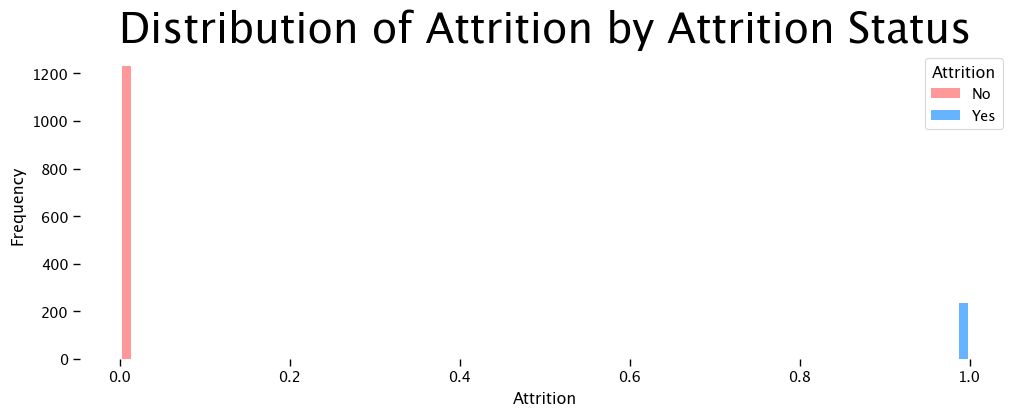

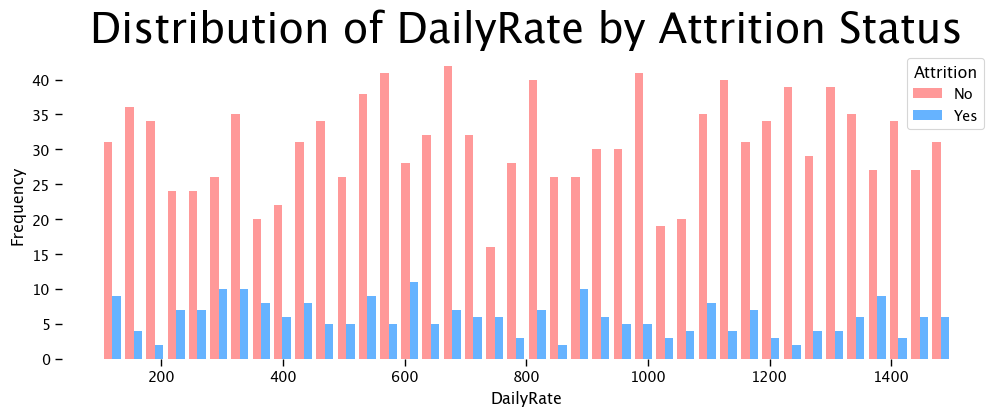

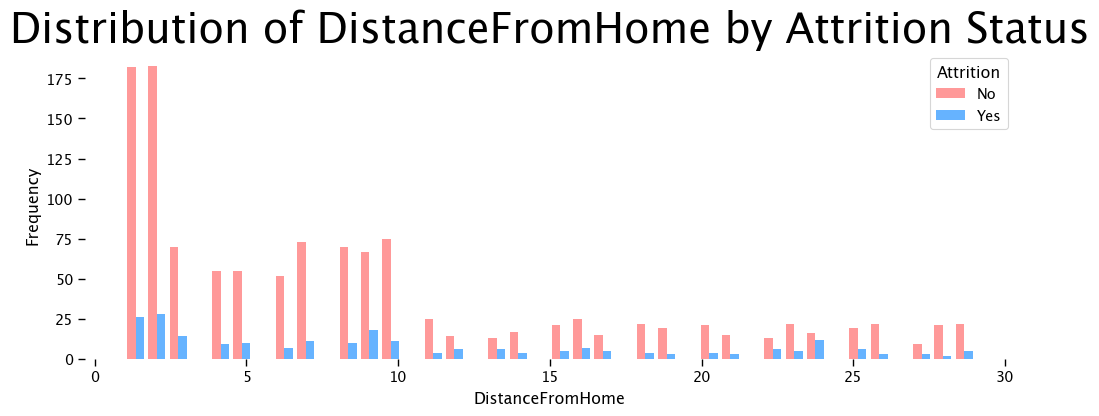

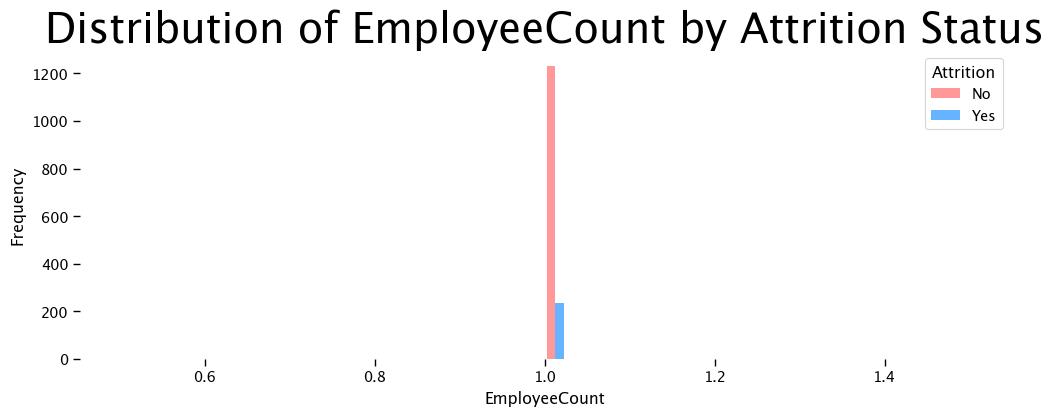

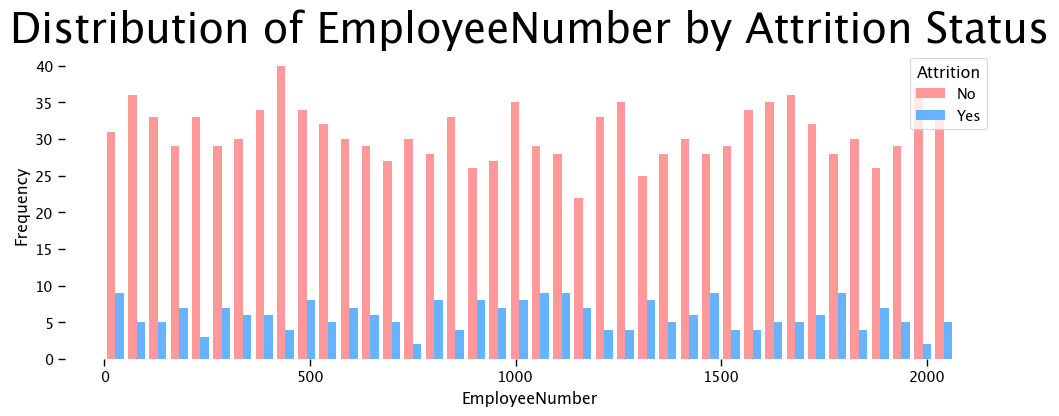

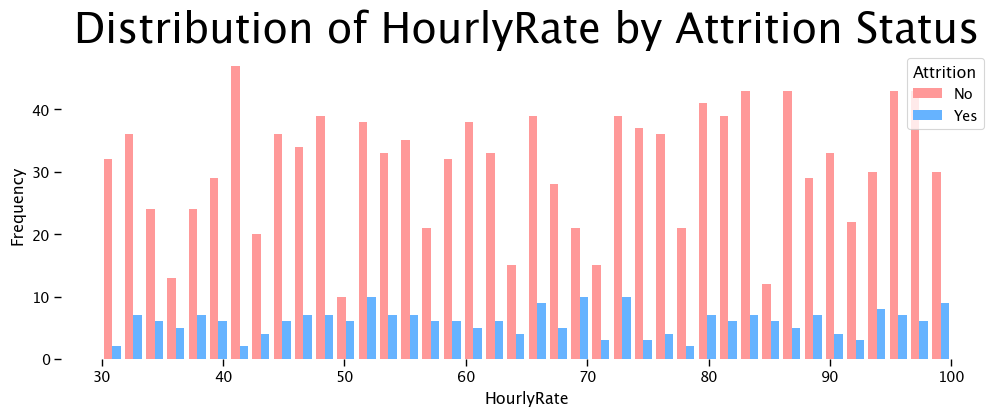

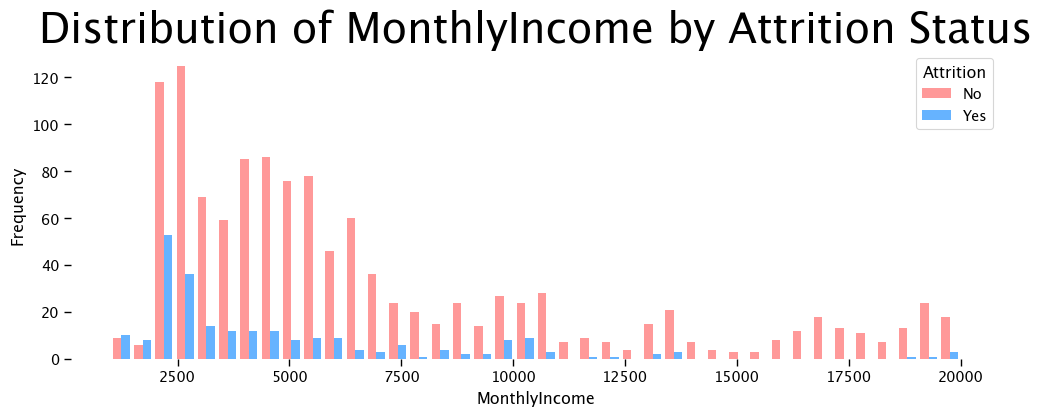

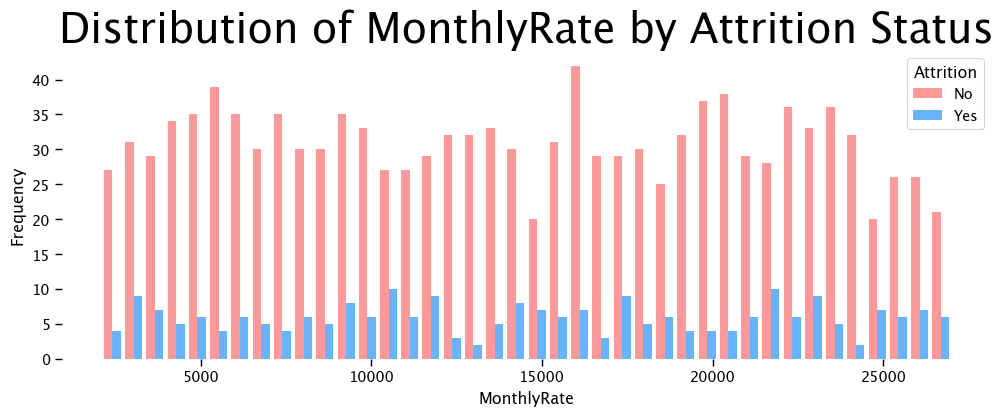

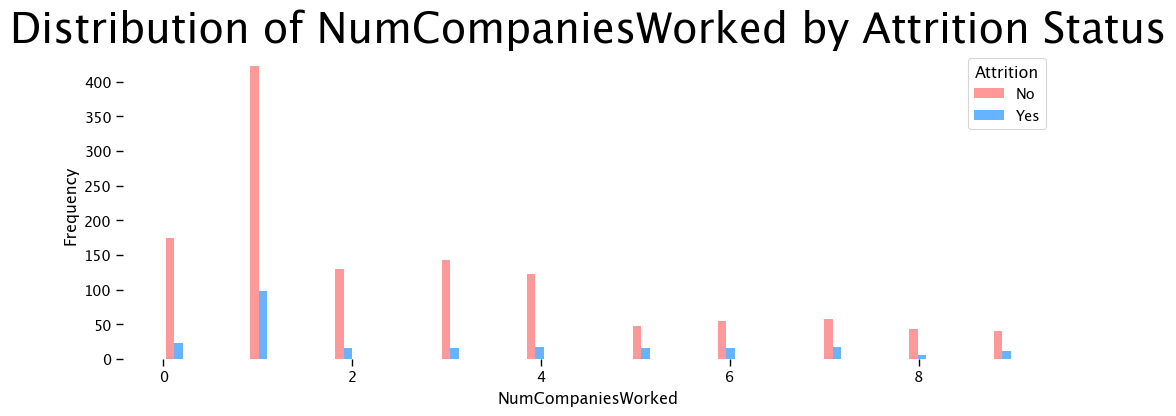

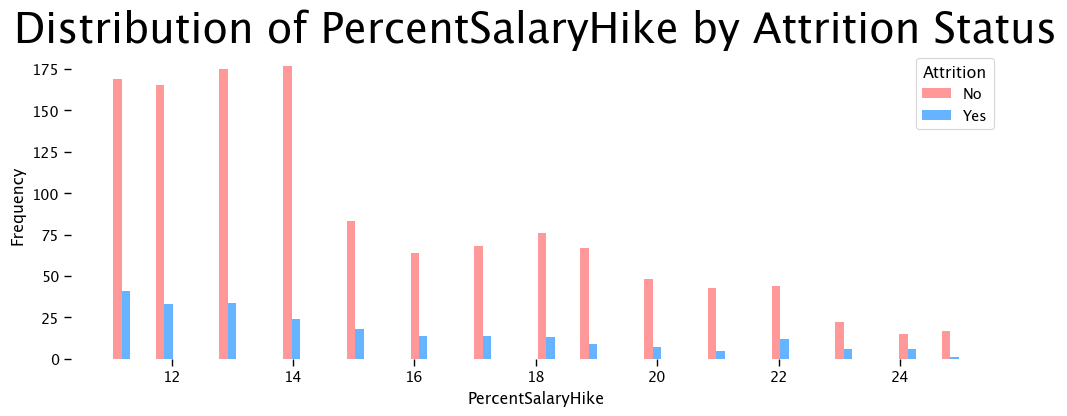

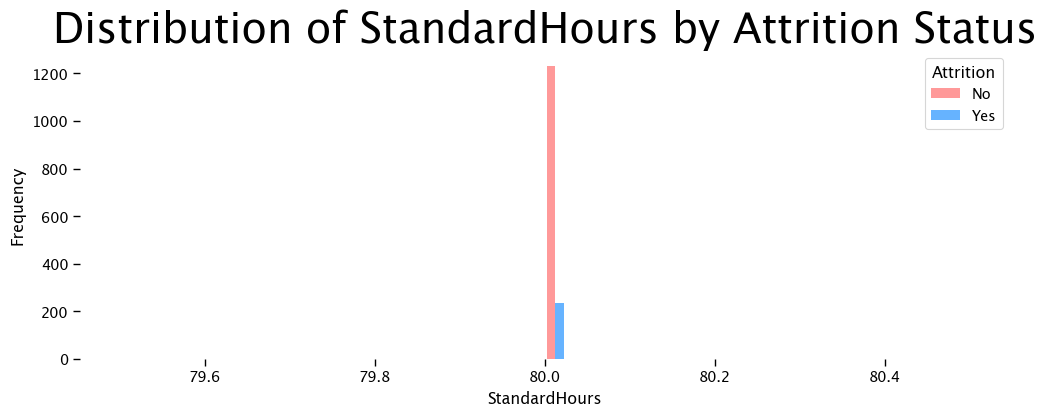

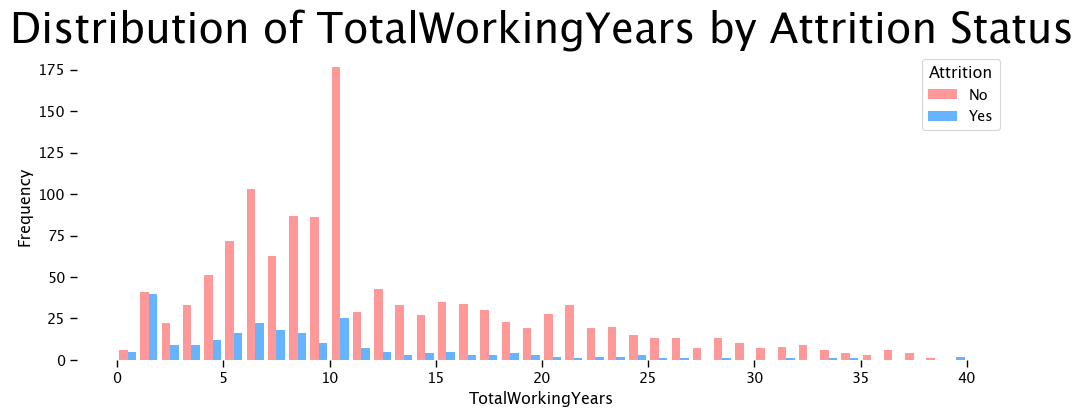

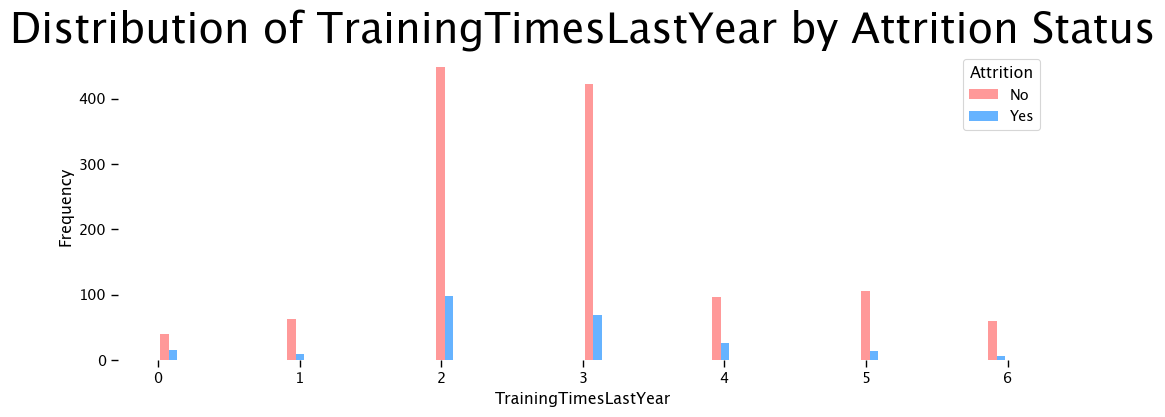

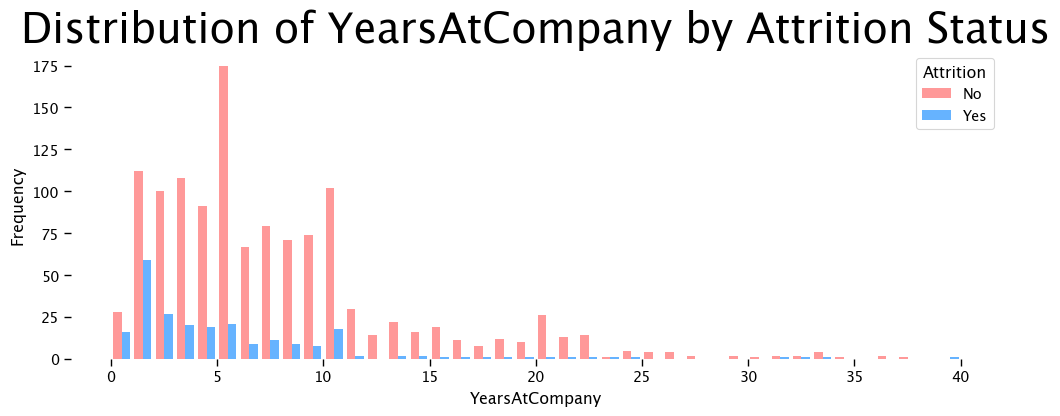

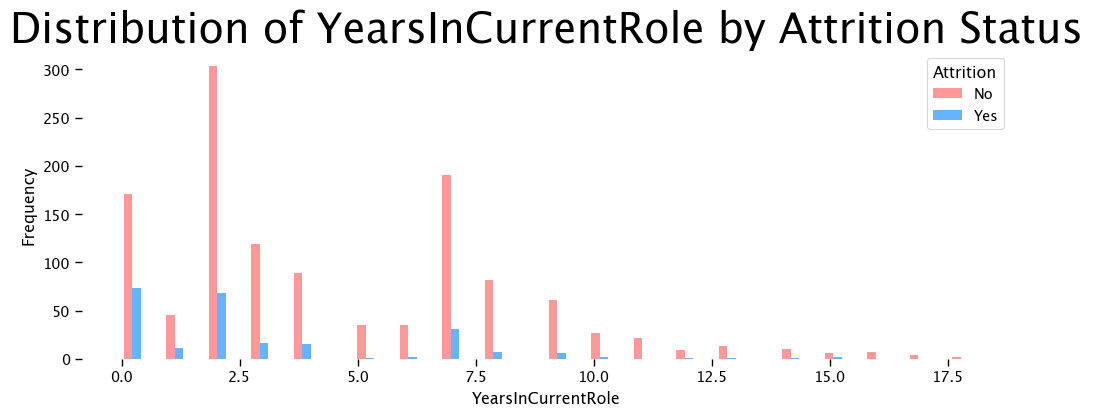

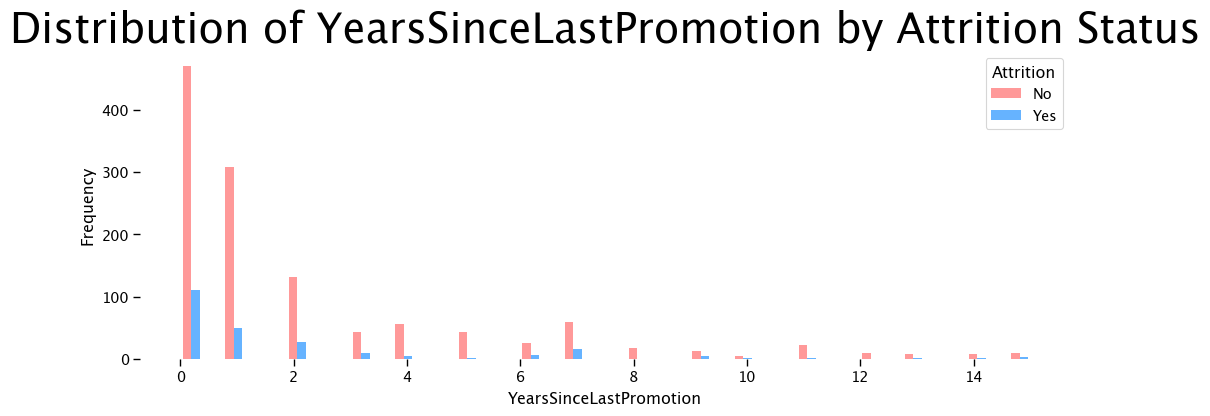

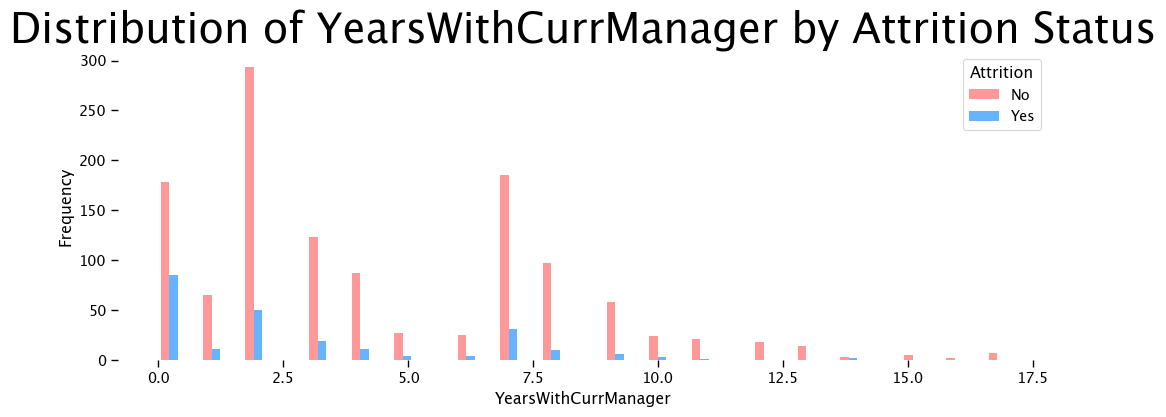

In [358]:
for i in numerical_variables:
  plot_continuous_variables(df, 'Attrition', i, 0, 1, f'images/figure 1.{numerical_variables.index(i)+5}.png')

### Correlation Matrix of the numerical variables to detect early signs of collinearity 

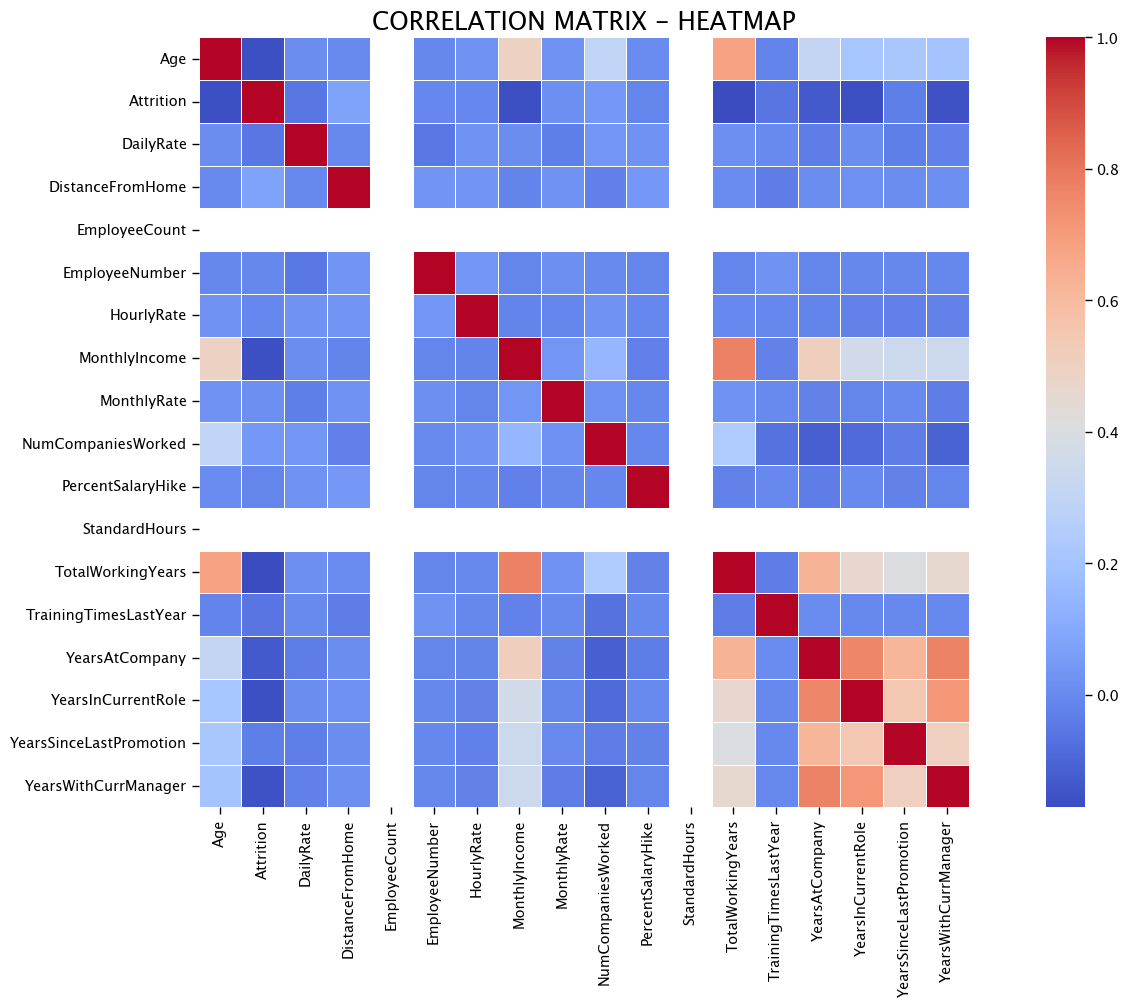

In [359]:
correlation_matrix(df, 'images/figure 2.0.png')

### Drop Variables

We drop the following variables: 
1. Employee count: Constant
2. Standard Hours : Constant
3. Employee number : Unique employee identifer and not a predictor 

In [360]:
# %% Drop All Potential Colinear variables
# Ideal work around: Use the variables to derive a single representative.
# Average would be ideal for most of the transaction statistics
df.drop(["EmployeeCount", "StandardHours", "EmployeeNumber"], axis=1, inplace=True)


### Sanity check on previous operation

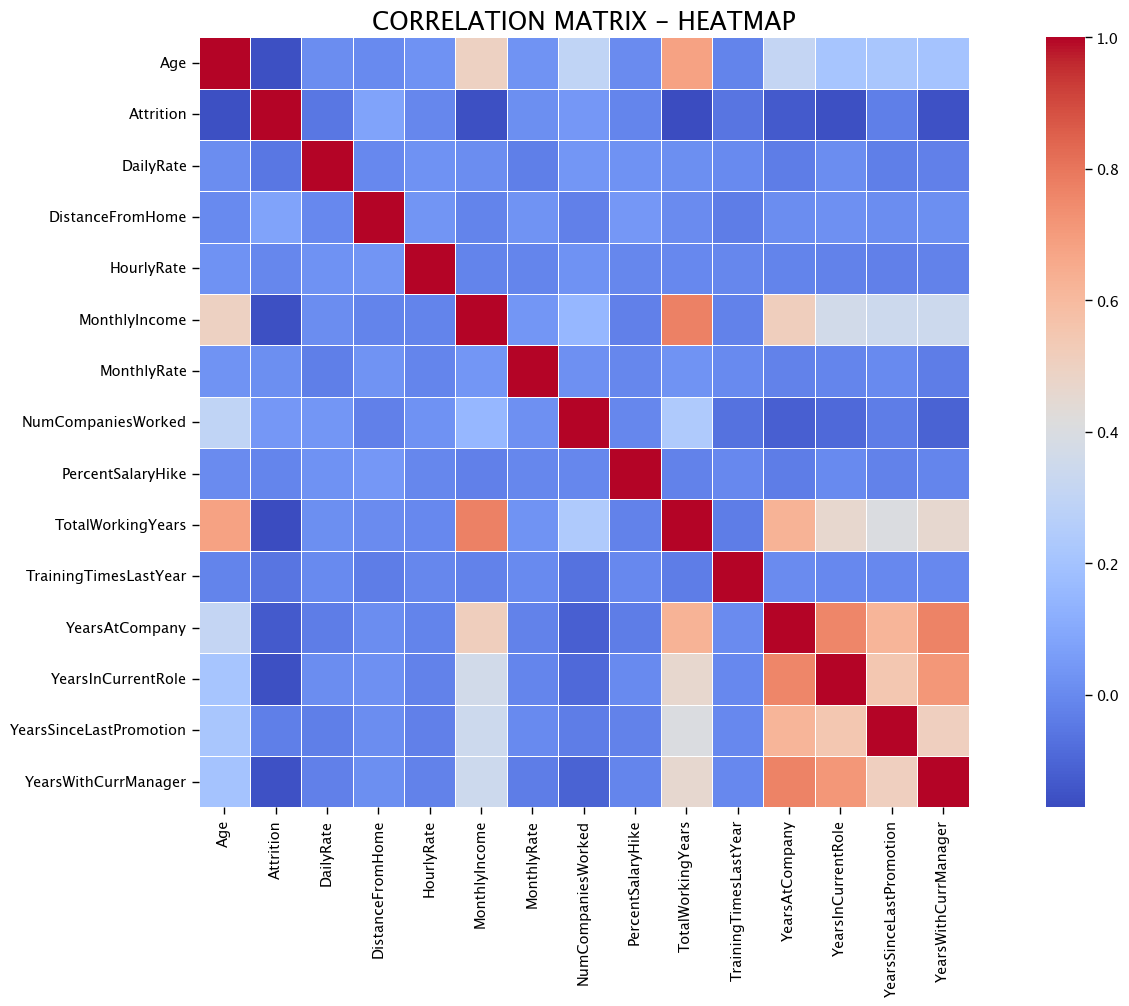

In [361]:
correlation_matrix(df, 'images/figure 2.1.png')

## Hypothesis Testing

### Categorical Variables: Chi-sqared test of independence

The purpose of this statistical test is to fine out if there is a relationship between the categorical variables and the response variable. 


In [362]:
# Example usage
chi_square_analysis_plot(
    df, 
    target_col='Attrition', 
    categorical_variables=categorical_variables, 
    output_folder="images", 
    initial_fig_num="2.2"
)

In [363]:
# List of categorical variables
categorical_variables = list(df.select_dtypes(include=['category']).columns)

# List of numerical variables
numerical_variables = df.select_dtypes(include=["int64"]).columns.tolist()


### Numerical Variables: t-test of independence

The purpose of this statistical test is to fine out if there is a relationship between the numerical variables and the response variable. 

In [364]:
t_test_analysis_plot(
    df, 
    numerical_variables=numerical_variables, 
    initial_fig_num='2.19', 
    output_folder="images"
)

Transform the categorical variables to make it easy for modeling by encoding them as instance of 1 or 0
for presence or absense of a response respectively. 

In [365]:
df = pd.get_dummies(
    df, 
    columns=categorical_variables, 
    drop_first=True
)


### Split the data into Training and Test Data set --- 70: 30

We use a stratified sampling to ensure we have an equal proportion of churn employees in the trains data as in the test data. 

In [366]:
features = df.drop(
    'Attrition', 
    axis = 1, 
    inplace = False
)
target = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    stratify = target,
    test_size = .3, 
    random_state = 44
)

### Boosting and Data Transformation
This is to ensure the distribution of churn and active events in the training dataset is equaly distributed. 
This is needed to train other instances of the model. 

In [367]:
sm = SMOTE(random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Training

## Champion Challenger Approach to Model Selection. 
Selection Criteria is the following order: 
1. Recall: It's costly for an employee to leave than to spend on them to keep them. 
2. Accuracy

### Vanilla Logistic Regression Model on the original data

Plug the values in the model without tuning any of the parameters. 

In [368]:
# Model instantiation
logreg_vanilla = LogisticRegression()

# Model training and evaluation with metrics like, training and test accuracy, precision and recall and F1 statistics. 
_ ,y_pred = evaluate_model(
    logreg_vanilla, 
    X_train, 
    y_train, 
    X_test, 
    y_test,
    save_path='images/figure 3.0.png', 
    model_name="Logistic Regression Vanilla - Orig Data"
)

# Model evaluation with 5 fold cross validation 
evaluate_model_with_cv(
    model=logreg_vanilla,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 3.1.png', 
    chart_name= "Logistic Regression Vanilla - Orig Data"
)

# Model evaluation -- Confusion matrix. 
plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Logistic Regression Vanilla - Orig Data",
    image_file='images/figure 3.2.png'
)


# Model evaluation -- Plot of the top 10 features by their importance
plot_top_features(
    logreg_vanilla, 
    feature_names=features.columns, 
    model_type='logistic',
    save_path='images/figure 3.3.png', 
    model_name="Logistic Regression Vanilla - Orig Data"
)

### Randomize Hyperparameterization for the optimal parameters for the logistics Regression Model on the original data set. 

In [369]:
# Parameter grid definition
param_grid = param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 1e4],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'class_weight': [None, 'balanced']
}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# plug in the parameter grid. 
logreg_cv = RandomizedSearchCV(
    logreg,param_grid, 
    cv=5, n_iter= 200, 
    random_state=43, 
    n_jobs= -1, 
    scoring="roc_auc", 
    verbose=0
)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print('Best cross-validation score: {:.2f}'.format(logreg_cv.best_score_))
results = pd.DataFrame(logreg_cv.cv_results_)
file_name = 'Hyperparameterization/Hyperparameter Search for Logistic Regression with Orig Data.csv'
results.to_csv(f'{file_name}', index = False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Tuned Logistic Regression Parameters: {'tol': 0.01, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 600, 'class_weight': None, 'C': 1}
Best cross-validation score: 0.83


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Tuned Logistic Regression Model on the original data

Plug the values in the model using the optimal parameters from the hyper parameterization

In [370]:
# Instantiate the regression model with the optimal parameters plugged in. 
logreg_tuned = LogisticRegression(**logreg_cv.best_params_)


_ ,y_pred = evaluate_model(
    logreg_tuned, 
    X_train, 
    y_train, 
    X_test, 
    y_test,
    save_path='images/figure 4.0.png', 
    model_name="Tuned Logistic Regression Vanilla - Orig Data"
    )


evaluate_model_with_cv(
    model=logreg_tuned,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 4.1.png', chart_name= "Tuned Logistic Regression Vanilla - Orig Data")


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Tuned Logistic Regression Vanilla - Orig Data",
    image_file='images/figure 4.2.png'
)


plot_top_features(logreg_tuned, feature_names=features.columns, model_type='logistic',save_path='images/figure 4.3.png', model_name="Tuned Logistic Regression Vanilla - Orig Data")

### Vanilla Logistic Regression Model on a balanced dataset. 

The data is balanced to ensure an even distribution of employees who churn versus those who stay. 

In [371]:
logreg_balanced = LogisticRegression()

_ ,y_pred = evaluate_model(logreg_balanced, X_train_balanced, y_train_balanced, X_test, y_test,save_path='images/figure 5.0.png', model_name="Vanilla Logistic Regression Model - Bal Data")

evaluate_model_with_cv(model=logreg_balanced,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 5.1.png', chart_name= "Vanilla Logistic Regression Model - Bal Data")


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Vanilla Logistic Regression Model - Bal Data",
    image_file='images/figure 5.2.png'
)


plot_top_features(logreg_balanced, feature_names=features.columns, model_type='logistic',save_path='images/figure 5.3.png', model_name="Vanilla Logistic Regression Model - Bal Data")

### Randomize Hyperparameterization for the optimal parameters for the logistics Regression Model on the balanced data set. 

In [372]:
param_grid = param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 1e4],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'class_weight': [None, 'balanced']
}


logreg = LogisticRegression()


logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, n_iter= 200, random_state=43, n_jobs= -1, scoring="roc_auc")


logreg_cv.fit(X_train_balanced, y_train_balanced)


print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print('Best cross-validation score: {:.2f}'.format(logreg_cv.best_score_))
results = pd.DataFrame(logreg_cv.cv_results_)
file_name = 'Hyperparameterization/Hyperparameter Search for Logistic Regression with Bal Data.csv'
results.to_csv(f'{file_name}', index = False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Tuned Logistic Regression Parameters: {'tol': 0.0001, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 100, 'class_weight': 'balanced', 'C': 10}
Best cross-validation score: 0.93


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Tuned Logistic Regression Model on the Balanced data

Plug the values in the model using the optimal parameters from the hyper parameterization

In [373]:
logreg_balanced_tuned = LogisticRegression(**logreg_cv.best_params_)

_ ,y_pred = evaluate_model(logreg_balanced_tuned, X_train_balanced, y_train_balanced, X_test, y_test,save_path='images/figure 6.0.png', model_name="Tuned Logistic Regression with Bal Data")

evaluate_model_with_cv(model=logreg_balanced_tuned,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 6.1.png', chart_name= "Tuned Logistic Regression with Bal Data")


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Tuned Logistic Regression with Bal Data",
    image_file='images/figure 6.2.png'
)


plot_top_features(logreg_balanced_tuned, feature_names=features.columns, model_type='logistic',save_path='images/figure 6.3.png', model_name="Tuned Logistic Regression with Bal Data")

### Vanilla Logistic Regression Model on a Scaled dataset. 

The data is converted to follow a Standard Normal Distribution

In [374]:
logreg_scaled_vanilla = LogisticRegression()

_ ,y_pred = evaluate_model(logreg_scaled_vanilla, X_train_scaled, y_train, X_test_scaled, y_test,save_path='images/figure 7.0.png', model_name="Vanilla Logistic Regression Model - Scal Data")

evaluate_model_with_cv(model=logreg_scaled_vanilla,
    X_train=X_train_scaled,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 7.1.png', chart_name= "Vanilla Logistic Regression Model - Scal Data")


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Vanilla Logistic Regression Model - Scal Data",
    image_file='images/figure 7.2.png'
)


plot_top_features(logreg_scaled_vanilla, feature_names=features.columns, model_type='logistic',save_path='images/figure 7.3.png', model_name="Vanilla Logistic Regression Model - Scal Data")

### Randomize Hyperparameterization for the optimal parameters for the logistics Regression Model on the scaled data set. 

In [375]:
param_grid = param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 1e4],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'class_weight': [None, 'balanced']
}


logreg = LogisticRegression()


logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, n_iter= 200, random_state=43, n_jobs= -1, scoring="roc_auc")


logreg_cv.fit(X_train_scaled, y_train)


print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print('Best cross-validation score: {:.2f}'.format(logreg_cv.best_score_))

results = pd.DataFrame(logreg_cv.cv_results_)
file_name = 'Hyperparameterization/Hyperparameter Search for Logistic Regression with Scal Data.csv'

results.to_csv(f'{file_name}', index = False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

Tuned Logistic Regression Parameters: {'tol': 0.0001, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 700, 'class_weight': None, 'C': 0.1}
Best cross-validation score: 0.83


### Tuned Logistic Regression Model on the Scaled data

Plug the values in the model using the optimal parameters from the hyper parameterization

In [376]:
logreg_scaled_tuned = LogisticRegression(**logreg_cv.best_params_)

_ ,y_pred = evaluate_model(logreg_scaled_tuned, X_train_scaled, y_train, X_test_scaled, y_test,save_path='images/figure 8.0.png', model_name="Tuned Logistic Regression Model - Scal Data")

evaluate_model_with_cv(model=logreg_scaled_tuned,
    X_train=X_train_scaled,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 8.1.png', chart_name= "Tuned Logistic Regression Model - Scal Data")


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Tuned Logistic Regression Model - Scal Data",
    image_file='images/figure 8.2.png'
)


plot_top_features(logreg_scaled_tuned, feature_names=features.columns, model_type='logistic',save_path='images/figure 8.3.png', model_name="Tuned Logistic Regression Model - Scal Data")

### Vanilla Decision Tree Model on the original dataset. 


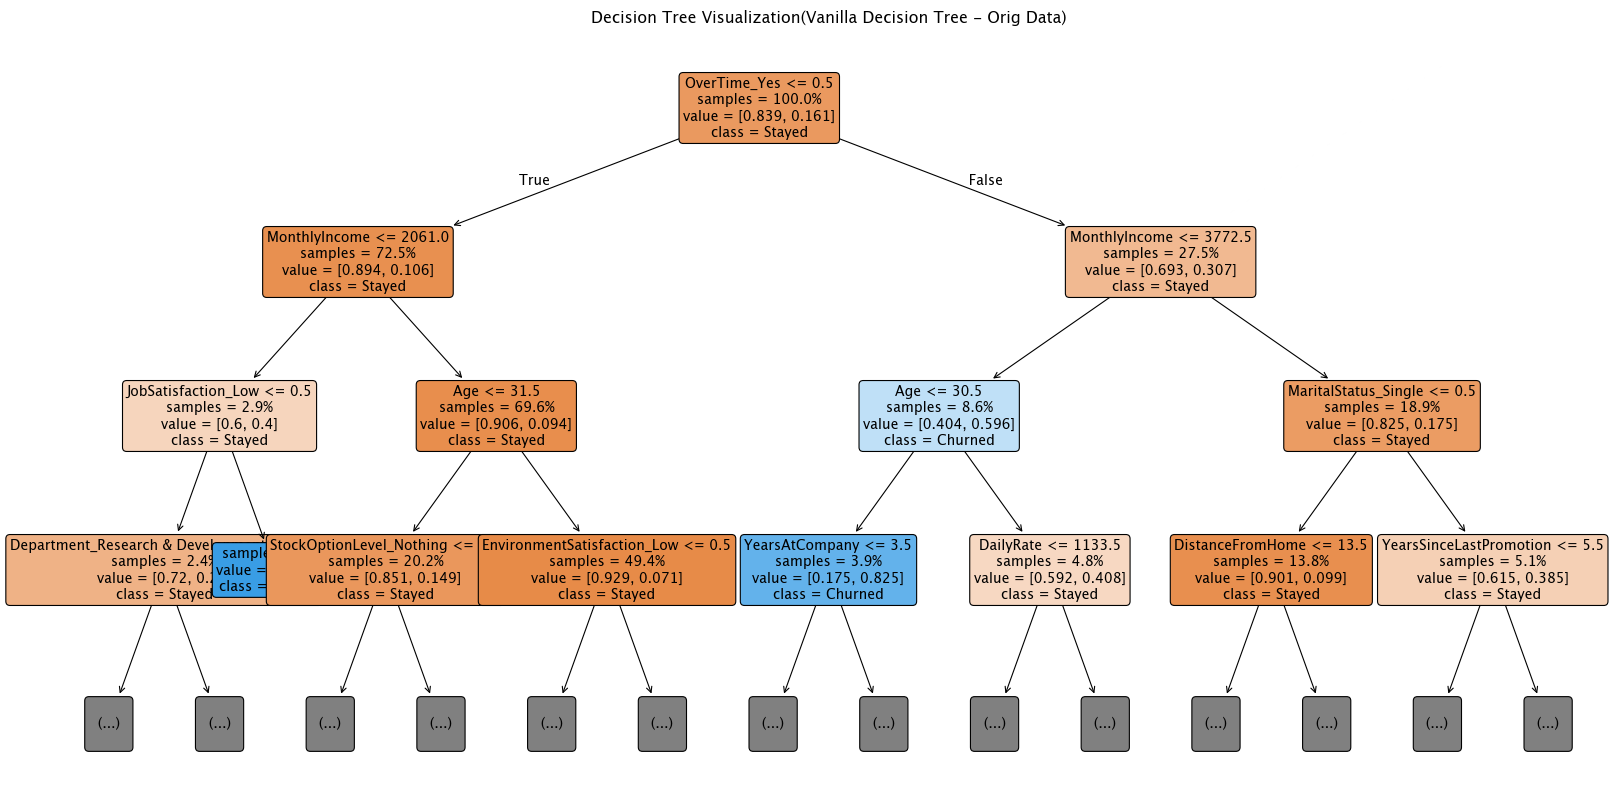

In [377]:
# Initialize the classifier
Decision_tree_vanilla = DecisionTreeClassifier(random_state=42)


_ ,y_pred = evaluate_model(
    Decision_tree_vanilla, 
    X_train, y_train, 
    X_test, 
    y_test,
    save_path='images/figure 9.0.png', 
    model_name="Vanilla Decision Tree - Orig Data"
)

evaluate_model_with_cv(model=Decision_tree_vanilla,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 9.1.png', chart_name= "Vanilla Decision Tree - Orig Data")


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Vanilla Decision Tree - Orig Data",
    image_file='images/figure 9.2.png'
)


plot_top_features(
    Decision_tree_vanilla, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 9.3.png', 
    model_name="Vanilla Decision Tree - Orig Data"
)

feature_names = X_train.columns.tolist()                     
class_names = Decision_tree_vanilla.classes_.astype(str) 


visualize_decision_tree(
    Decision_tree_vanilla, 
    feature_names=feature_names, 
    class_names=["Stayed", "Churned"], 
    image_file="images/figure 9.4.png", 
    max_depth=3, 
    model_name="Vanilla Decision Tree - Orig Data"
)

### Randomize Hyperparameterization for the optimal parameters for the Decision Tree Model on the original data set. 

In [378]:
# Define the classifier
Decison_tree_tuned = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'max_depth': randint(1, 20),  # Random integer between 1 and 20
    'min_samples_split': randint(2, 20),  # Random integer between 2 and 20
    'min_samples_leaf': randint(1, 20),  # Random integer between 1 and 20
    'criterion': ['gini', 'entropy'],   # Criterion for splitting
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(Decison_tree_tuned,
                                   param_distributions=param_dist,
                                   n_iter=200, cv=5, scoring='roc_auc',
                                   random_state=42)


# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(random_search.best_score_))

results = pd.DataFrame(random_search.cv_results_)
file_name = 'Hyperparameterization/Hyperparameter Search for Decision Tree with Orig Data.csv'
results.to_csv(f'{file_name}', index = False)


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 11, 'min_samples_split': 5}
Best cross-validation score: 0.69


### Tuned Decision Tree Model on the original data

Plug the values in the model using the optimal parameters from the hyper parameterization

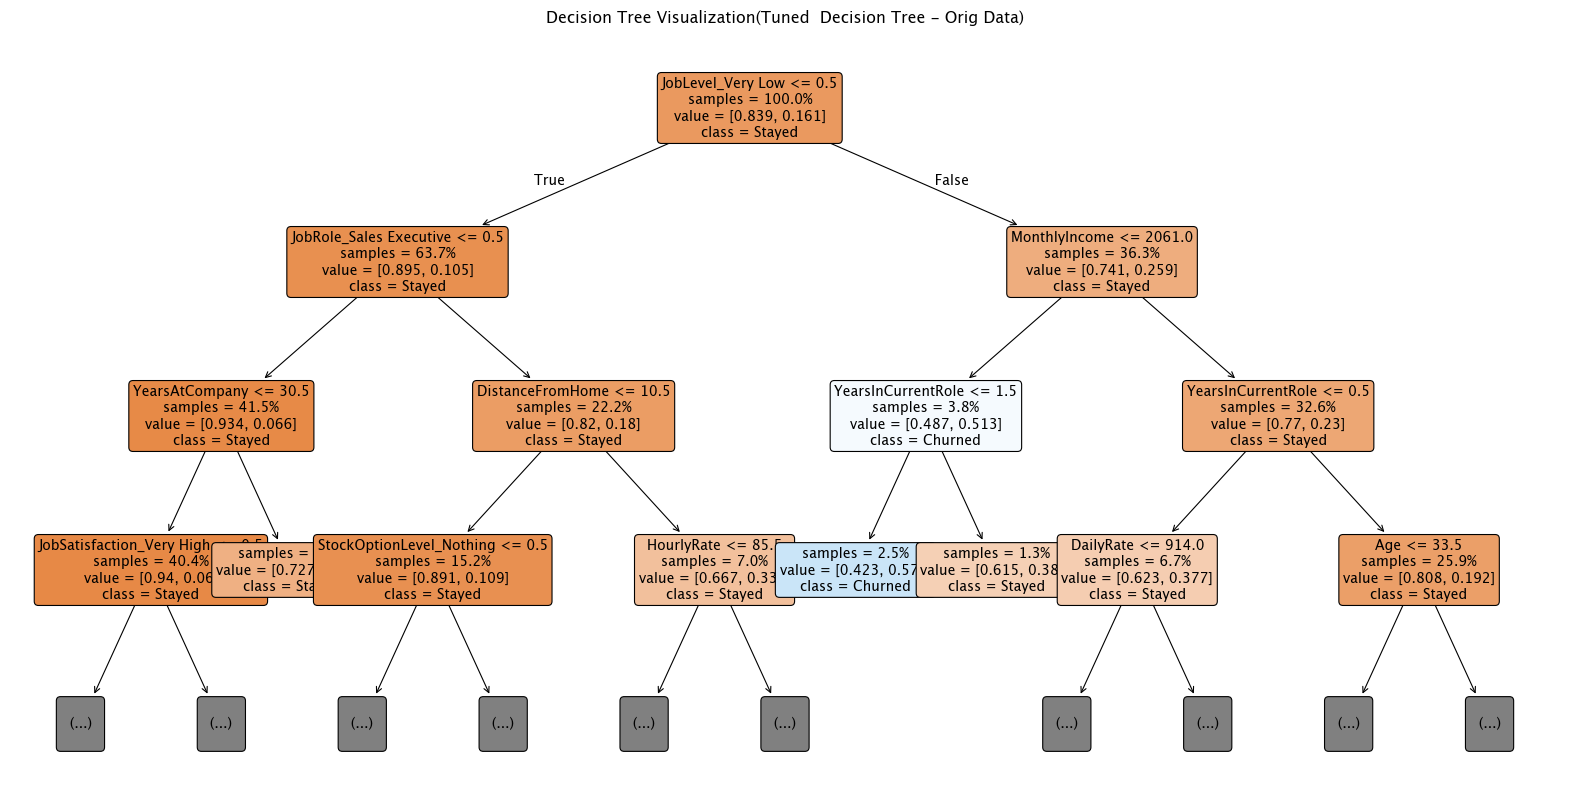

In [379]:
Decision_tree_orig_tuned = DecisionTreeClassifier(**random_search.best_params_, random_state=0)

_ ,y_pred = evaluate_model(
    Decision_tree_orig_tuned, 
    X_train, 
    y_train, 
    X_test, 
    y_test,
    save_path='images/figure 10.0.png', 
    model_name="Tuned  Decision Tree - Orig Data"
)

evaluate_model_with_cv(model=Decision_tree_orig_tuned,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 10.1.png', chart_name= "Tuned  Decision Tree - Orig Data"
)


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Tuned  Decision Tree - Orig Data",
    image_file='images/figure 10.2.png'
)


plot_top_features(
    Decision_tree_orig_tuned, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 10.3.png', 
    model_name="Tuned  Decision Tree - Orig Data"
    )

visualize_decision_tree(
    Decision_tree_orig_tuned, 
    feature_names=feature_names, 
    class_names=["Stayed", "Churned"], 
    image_file="images/figure 10.4.png", 
    model_name="Tuned  Decision Tree - Orig Data", 
    max_depth=3)

### Vanilla Decision Tree Model on the balanced dataset. 


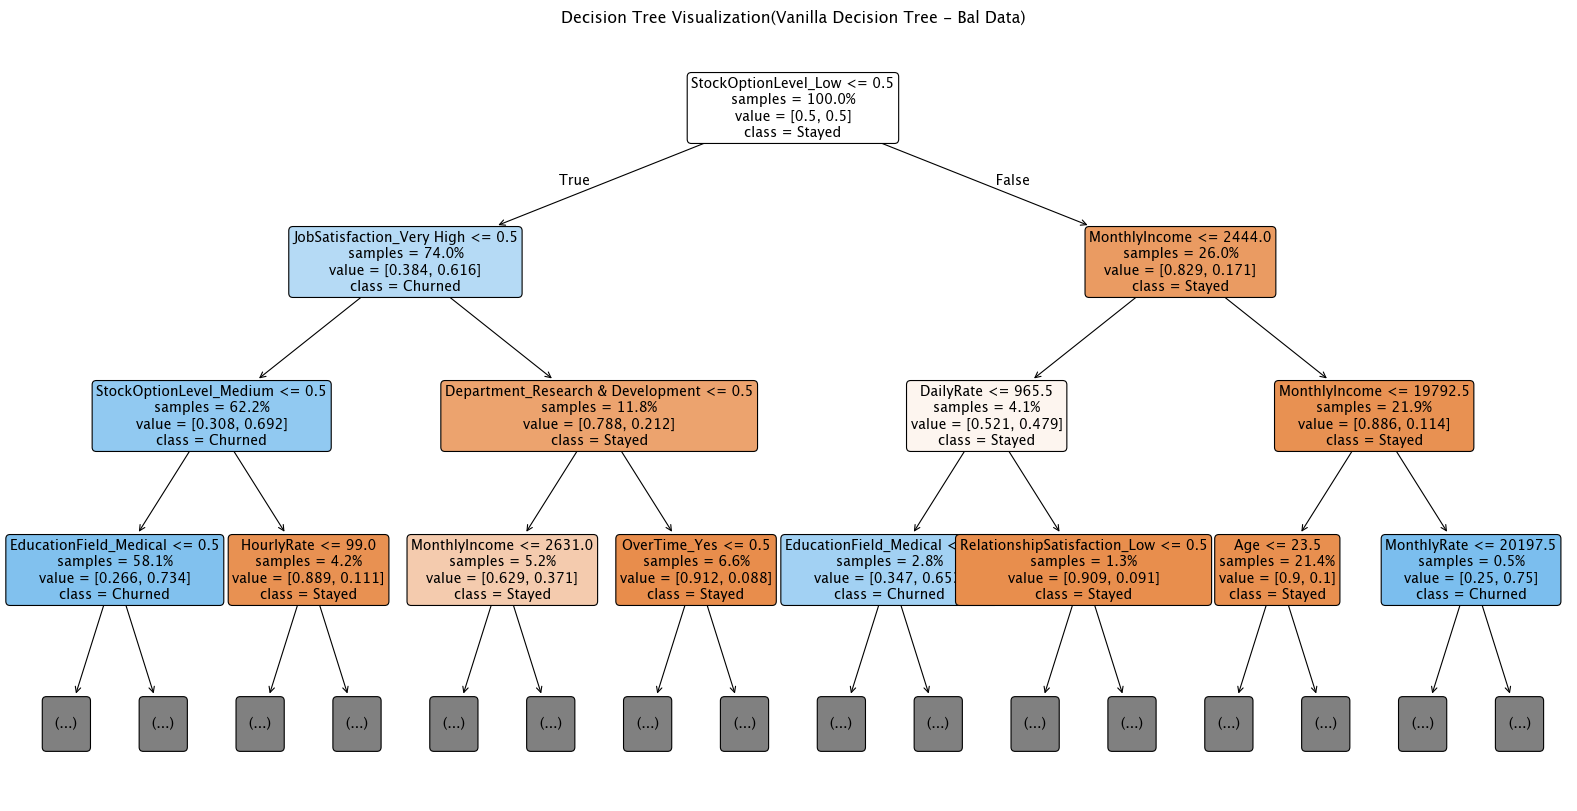

In [380]:
# Initialize the classifier
Decision_tree_balanced = DecisionTreeClassifier(random_state=42)


_ ,y_pred = evaluate_model(
    Decision_tree_balanced, 
    X_train_balanced, 
    y_train_balanced, 
    X_test, 
    y_test,
    save_path='images/figure 11.0.png', 
    model_name="Vanilla Decision Tree - Bal Data"
)

evaluate_model_with_cv(model=Decision_tree_balanced,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 11.1.png', chart_name= "Vanilla Decision Tree - Bal Data"
)


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Vanilla Decision Tree - Bal Data",
    image_file='images/figure 11.2.png'
)


plot_top_features(
    Decision_tree_balanced, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 11.3.png', 
    model_name="Vanilla Decision Tree - Bal Data"
)

visualize_decision_tree(
    Decision_tree_balanced, 
    feature_names=feature_names, 
    class_names=["Stayed", "Churned"], 
    image_file="images/figure 11.4.png", 
    max_depth=3, 
    model_name="Vanilla Decision Tree - Bal Data"
)

### Randomize Hyperparameterization for the optimal parameters for the Decision Tree Model on the balanced data set. 

In [381]:
# Define the classifier
Decison_tree_tuned = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'max_depth': randint(1, 20),  # Random integer between 1 and 20
    'min_samples_split': randint(2, 20),  # Random integer between 2 and 20
    'min_samples_leaf': randint(1, 20),  # Random integer between 1 and 20
    'criterion': ['gini', 'entropy'],   # Criterion for splitting
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(Decison_tree_tuned,
                                   param_distributions=param_dist,
                                   n_iter=200, cv=5, scoring='roc_auc',
                                   random_state=42)


# Perform RandomizedSearchCV
random_search.fit(X_train_balanced, y_train_balanced)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(random_search.best_score_))

results = pd.DataFrame(random_search.cv_results_)
file_name = 'Hyperparameterization/Hyperparameter Search for Decision Tree with Bal Data.csv'
results.to_csv(f'{file_name}', index = False)


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 3}
Best cross-validation score: 0.86


### Tuned Decision Tree Model on the balanced data

Plug the values in the model using the optimal parameters from the hyper parameterization

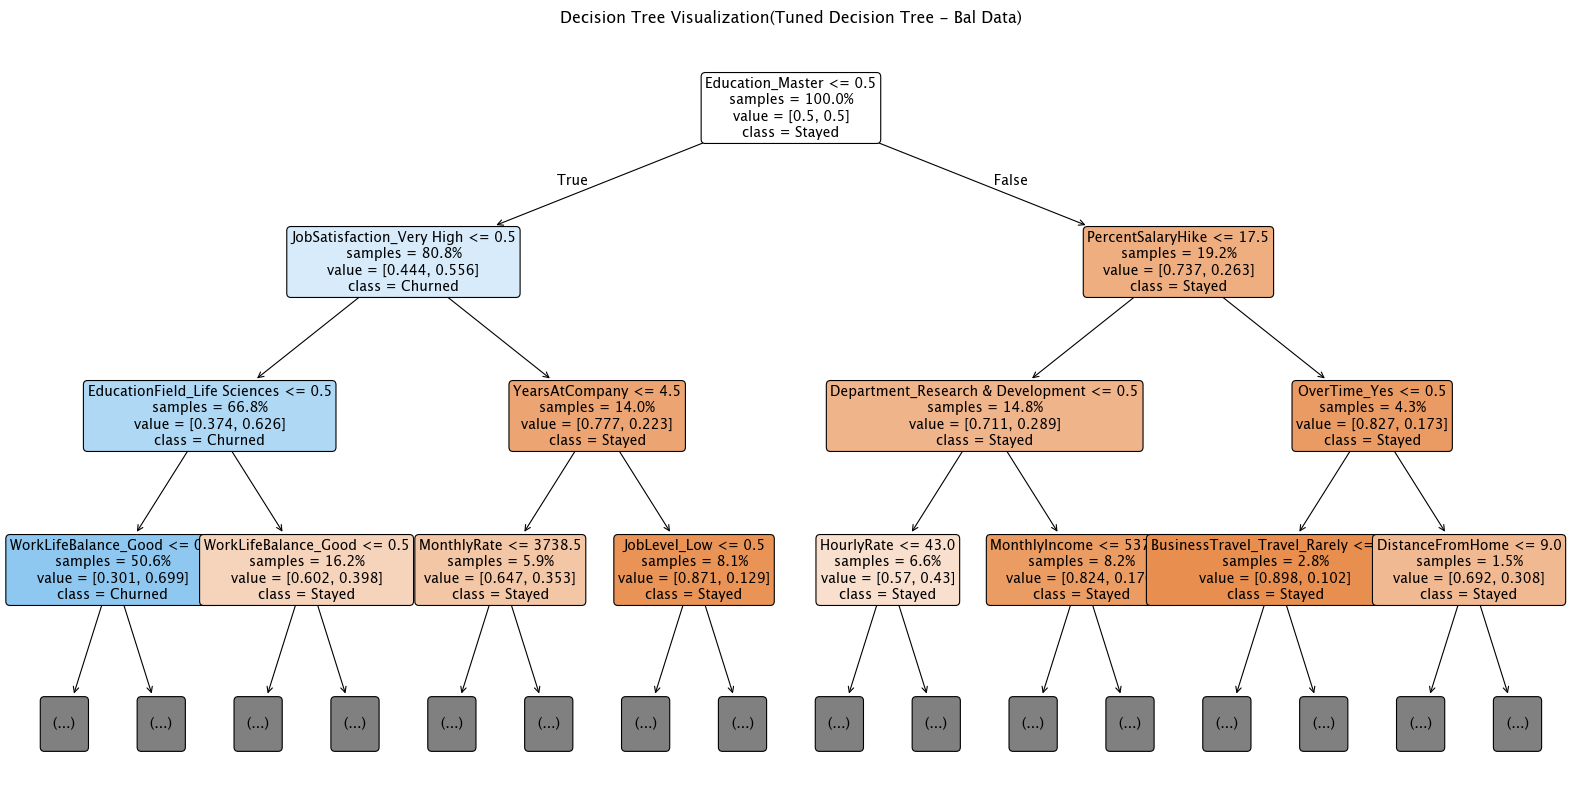

In [382]:
Decision_tree_balanced_tuned = DecisionTreeClassifier(**random_search.best_params_, random_state=0)

_ ,y_pred = evaluate_model(
    Decision_tree_balanced_tuned, 
    X_train_balanced, 
    y_train_balanced, 
    X_test, 
    y_test,save_path='images/figure 12.0.png', 
    model_name="Tuned Decision Tree - Bal Data"
)

evaluate_model_with_cv(
    model=Decision_tree_balanced_tuned,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 12.1.png', 
    chart_name= "Tuned Decision Tree - Bal Data"
)


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Tuned Decision Tree - Bal Data",
    image_file='images/figure 12.2.png'
)


plot_top_features(
    Decision_tree_balanced_tuned, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 12.3.png', 
    model_name="Tuned Decision Tree - Bal Data"
)

visualize_decision_tree(
    Decision_tree_balanced_tuned, 
    feature_names=feature_names, 
    class_names=["Stayed", "Churned"], 
    image_file="images/figure 12.4.png", 
    max_depth=3, 
    model_name="Tuned Decision Tree - Bal Data"
)

### Vanilla Decision Tree Model on the scaled data



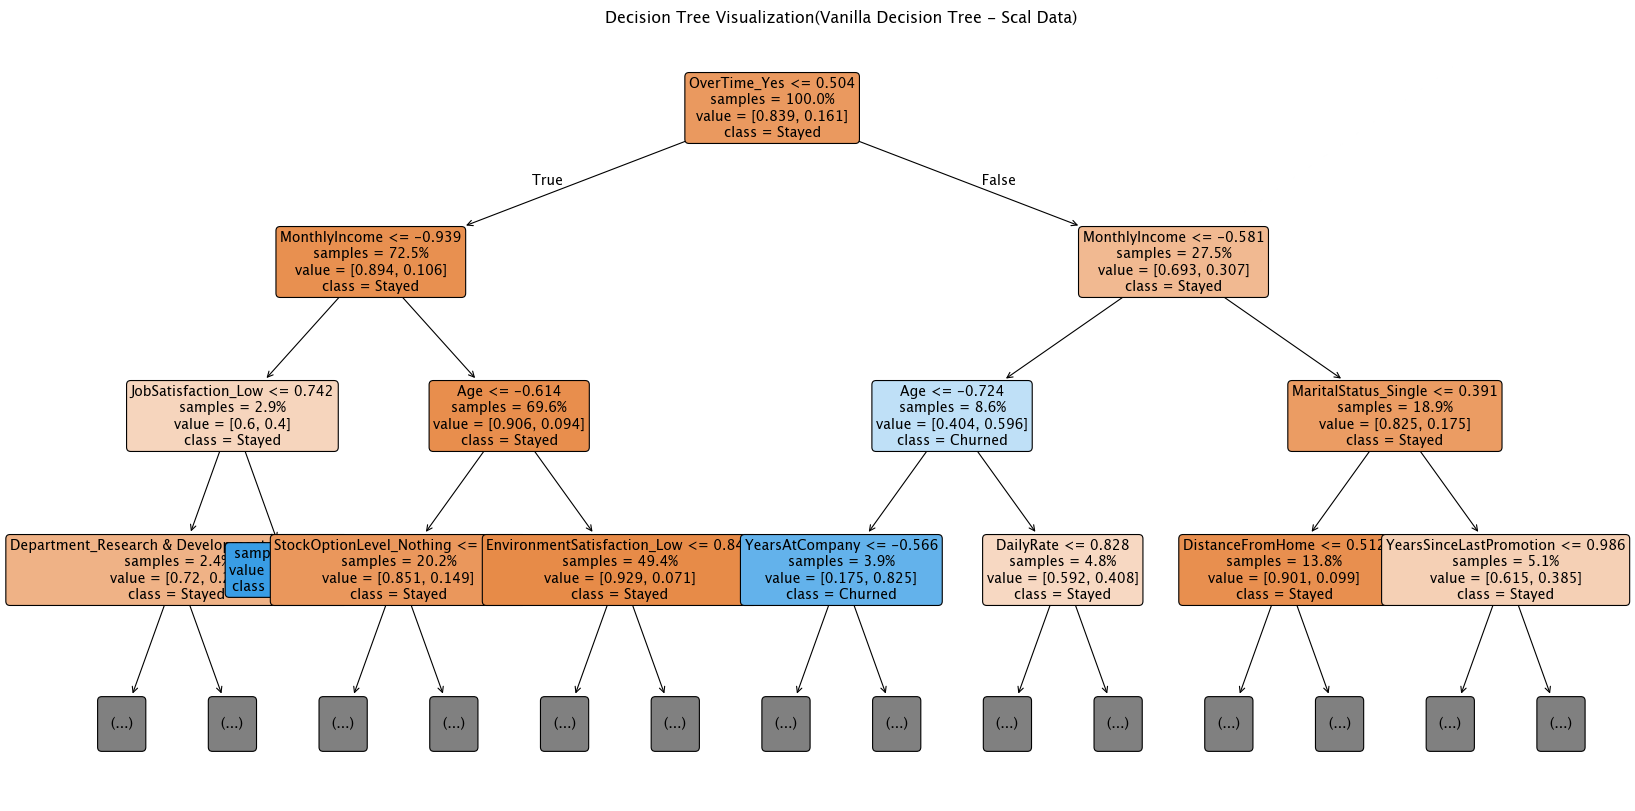

In [383]:
# Initialize the classifier
Decision_tree_scaled = DecisionTreeClassifier(random_state=42)


_ ,y_pred = evaluate_model(
    Decision_tree_scaled, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test,save_path='images/figure 13.0.png', 
    model_name="Vanilla Decision Tree - Scal Data"
)

evaluate_model_with_cv(
    model=Decision_tree_scaled,
    X_train=X_train_scaled,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 13.1.png', 
    chart_name= "Vanilla Decision Tree - Scal Data"
)


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Vanilla Decision Tree - Scal Data",
    image_file='images/figure 13.2.png'
)


plot_top_features(
    Decision_tree_scaled, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 13.3.png', 
    model_name="Vanilla Decision Tree - Scal Data"
)

visualize_decision_tree(
    Decision_tree_scaled, 
    feature_names=feature_names, 
    class_names=["Stayed", "Churned"], 
    image_file="images/figure 13.4.png", 
    max_depth=3, 
    model_name="Vanilla Decision Tree - Scal Data"
)

### Randomize Hyperparameterization for the optimal parameters for the Decision Tree Model on the scaled data set. 

In [384]:
# Define the classifier
Decison_tree_tuned = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'max_depth': randint(1, 20),  # Random integer between 1 and 20
    'min_samples_split': randint(2, 20),  # Random integer between 2 and 20
    'min_samples_leaf': randint(1, 20),  # Random integer between 1 and 20
    'criterion': ['gini', 'entropy'],   # Criterion for splitting
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(Decison_tree_tuned,
                                   param_distributions=param_dist,
                                   n_iter=200, cv=5, scoring='roc_auc',
                                   random_state=42)


# Perform RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(random_search.best_score_))

results = pd.DataFrame(random_search.cv_results_)
file_name = 'Hyperparameterization/Hyperparameter Search for Decision Tree with Scal Data.csv'
results.to_csv(f'{file_name}', index = False)


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 11, 'min_samples_split': 5}
Best cross-validation score: 0.69


### Tuned Decision Tree Model on the scaled data

Plug the values in the model using the optimal parameters from the hyper parameterization

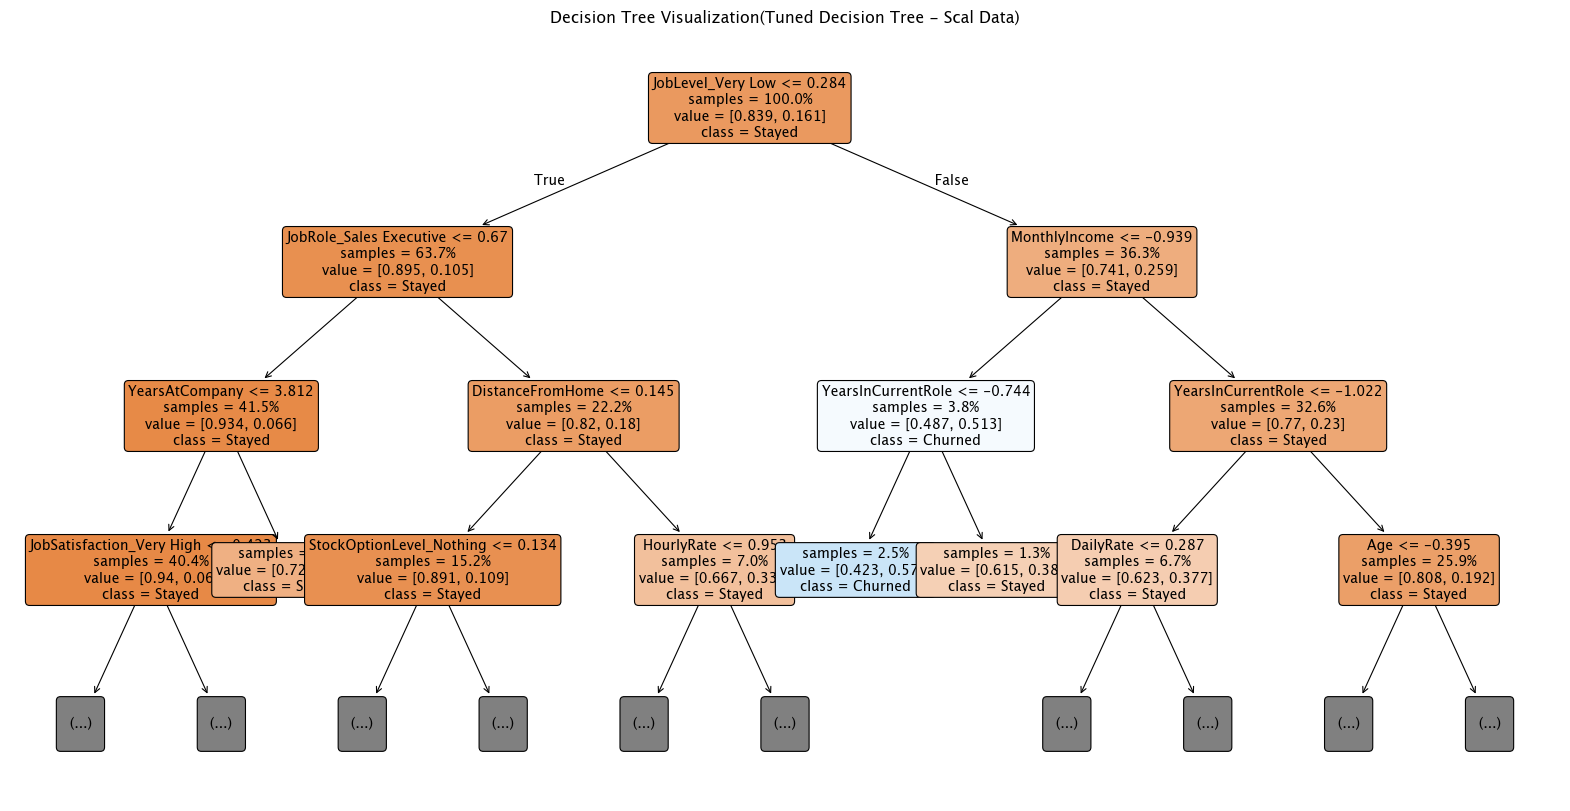

In [385]:
Decision_tree_scaled_tuned = DecisionTreeClassifier(**random_search.best_params_, random_state=0)

_ ,y_pred = evaluate_model(
    Decision_tree_scaled_tuned, 
    X_train_scaled, 
    y_train, 
    X_test_scaled, 
    y_test,
    save_path='images/figure 14.0.png', 
    model_name="Tuned Decision Tree - Scal Data"
)

evaluate_model_with_cv(
    model=Decision_tree_scaled_tuned,
    X_train=X_train_scaled,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 14.1.png', 
    chart_name= "Tuned Decision Tree - Scal Data"
)


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Tuned Decision Tree - Scal Data",
    image_file='images/figure 14.2.png'
)


plot_top_features(
    Decision_tree_scaled_tuned, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 14.3.png', 
    model_name="Tuned Decision Tree - Scal Data"
)

visualize_decision_tree(
    Decision_tree_scaled_tuned, 
    feature_names=feature_names, 
    class_names=["Stayed", "Churned"], 
    image_file="images/figure 14.4.png", 
    model_name="Tuned Decision Tree - Scal Data", 
    max_depth=3
)

### Vanilla Random Forest Model on the Original data



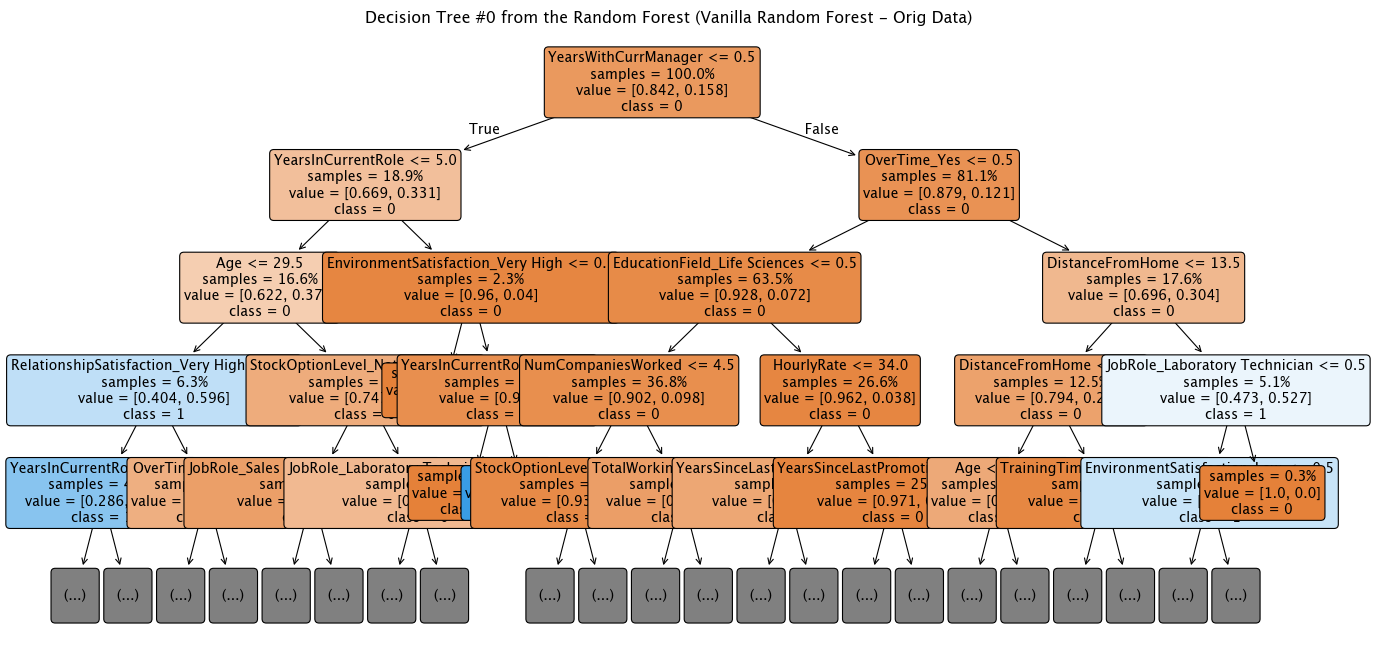

In [386]:
rf_vanilla = RandomForestClassifier()


_ ,y_pred = evaluate_model(
    rf_vanilla, 
    X_train, 
    y_train, 
    X_test, 
    y_test,
    save_path='images/figure 15.0.png', 
    model_name="Vanilla Random Forest - Orig Data"
)

evaluate_model_with_cv(
    model=rf_vanilla,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 15.1.png', 
    chart_name= "Vanilla Random Forest - Orig Data"
)


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Vanilla Random Forest - Orig Data",
    image_file='images/figure 15.2.png'
)


plot_top_features(
    rf_vanilla, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 15.3.png', 
    model_name="Vanilla Random Forest - Orig Data"
)

visualize_tree_from_forest(
    rf_model=rf_vanilla,
    feature_names=X_train.columns,
    class_names=class_names,
    tree_index=0,      # pick a tree (0 to n_estimators - 1)
    max_depth=4,       # limits the depth for readability
    figsize=(16, 8), 
    save_path="images/figure 15.4.png", 
    model_name="Vanilla Random Forest - Orig Data"
)

### Randomize Hyperparameterization for the optimal parameters for the Random Forest on the Original data set. 

In [387]:

param_grid = {
    'n_estimators': np.arange(100, 1100, 100),            # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],             # Number of features to consider at each split
    'max_depth': [None] + list(np.arange(10, 110, 10)),   # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20, 2),             # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20, 2),              # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],                           # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy'],                     # The function to measure the quality of a split
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Weights associated with classes
}

# Set up the Randomized Search
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=0,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform RandomizedSearchCV
random_search.fit(
    X_train, 
    y_train
)


# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(random_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(random_search.best_score_))

results = pd.DataFrame(random_search.cv_results_)
file_name = 'Hyperparameterization/Hyperparameter Search for Random Forest with Orig Data.csv'
results.to_csv(f'{file_name}', index = False)


Tuned Logistic Regression Parameters: {'n_estimators': np.int64(800), 'min_samples_split': np.int64(16), 'min_samples_leaf': np.int64(17), 'max_features': 'log2', 'max_depth': np.int64(30), 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}
Best cross-validation score: 0.78


### Tuned Random Forest Model on the Original Data

Plug the values in the model using the optimal parameters from the hyper parameterizationa

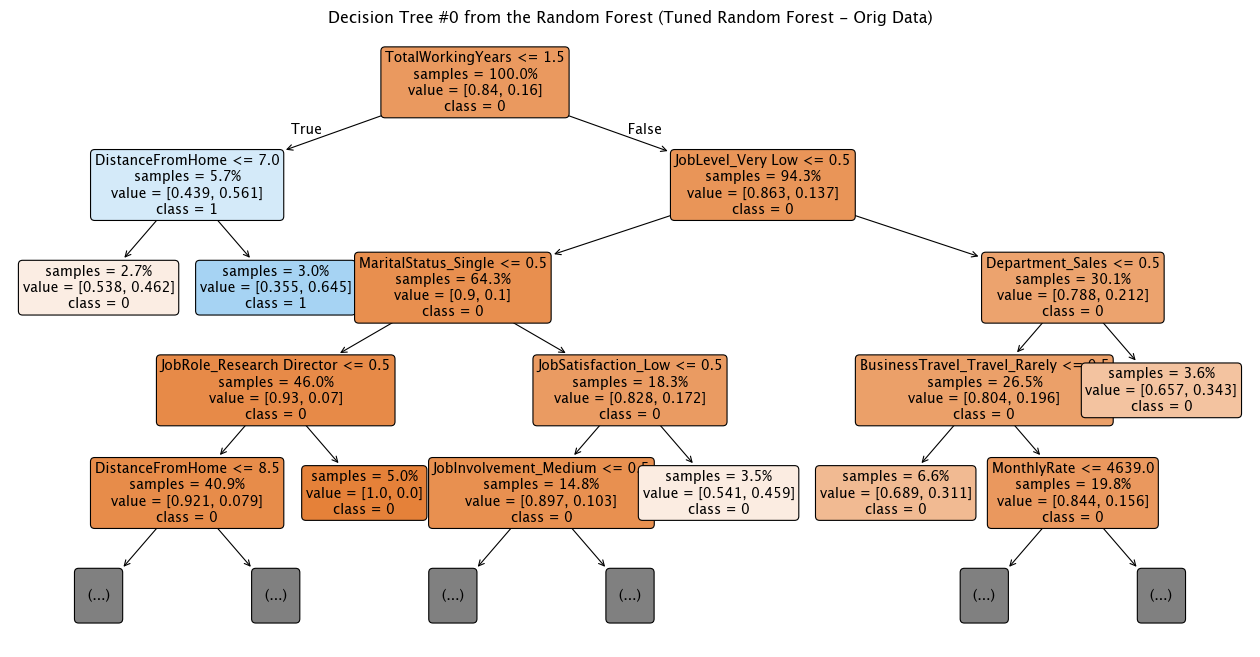

In [390]:
randomf_orig_tuned = RandomForestClassifier(**random_search.best_params_, random_state=0)


_ ,y_pred = evaluate_model(
    randomf_orig_tuned, 
    X_train, 
    y_train, 
    X_test, 
    y_test,
    save_path='images/figure 16.0.png', 
    model_name="Tuned Random Forest - Orig Data"
)

evaluate_model_with_cv(
    model=randomf_orig_tuned,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 16.1.png', 
    chart_name= "Tuned Random Forest - Orig Data"
)


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Tuned Random Forest - Orig Data",
    image_file='images/figure 16.2.png'
)


plot_top_features(
    randomf_orig_tuned, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 16.3.png', 
    model_name="Tuned Random Forest - Orig Data"
)

visualize_tree_from_forest(
    rf_model=randomf_orig_tuned,
    feature_names=X_train.columns,
    class_names=class_names,
    tree_index=0,      # pick a tree (0 to n_estimators - 1)
    max_depth=4,       # limits the depth for readability
    figsize=(16, 8), 
    save_path="images/figure 16.4.png", 
    model_name="Tuned Random Forest - Orig Data"
)

### Vanilla Random Forest Model on the Original data



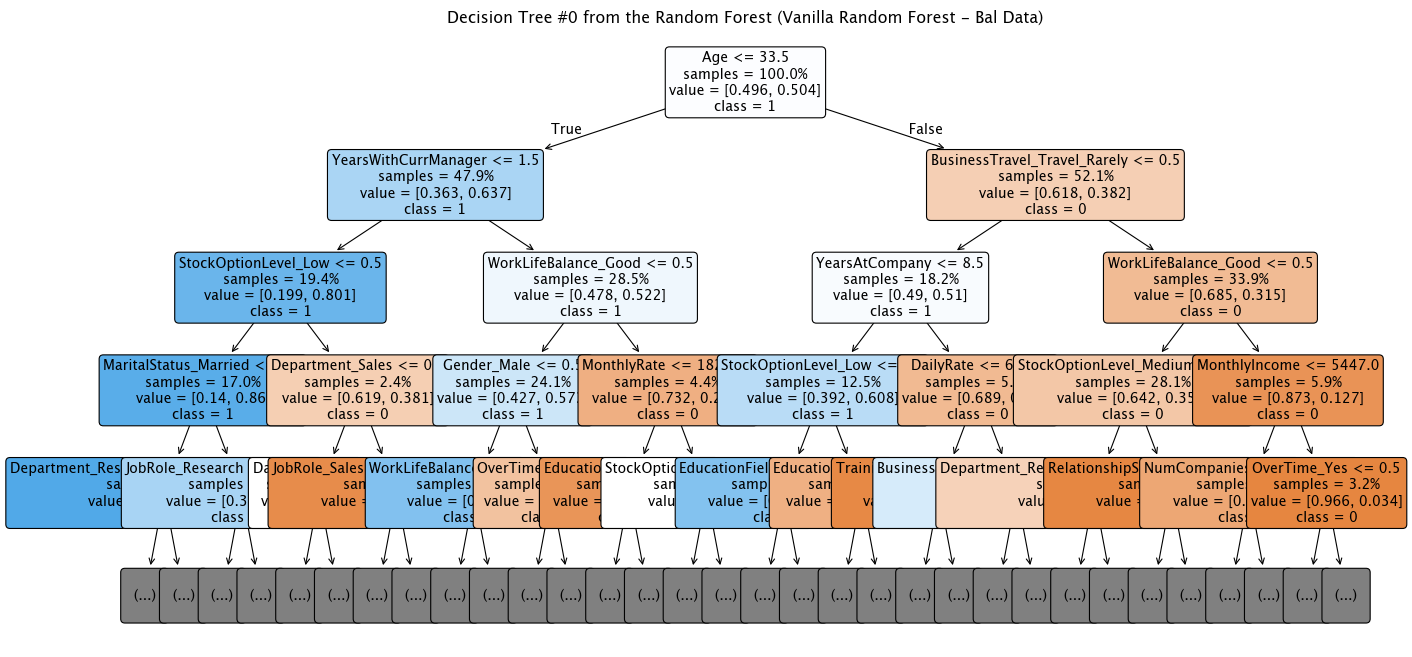

In [391]:
rf_vanilla_balanced = RandomForestClassifier()


_ ,y_pred = evaluate_model(
    rf_vanilla_balanced, 
    X_train_balanced, 
    y_train_balanced, 
    X_test, 
    y_test,
    save_path='images/figure 17.0.png', 
    model_name="Vanilla Random Forest - Bal Data"
)

evaluate_model_with_cv(
    model=rf_vanilla_balanced,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 17.1.png', 
    chart_name= "Vanilla Random Forest - Bal Data"
)


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Vanilla Random Forest - Bal Data",
    image_file='images/figure 17.2.png'
)


plot_top_features(
    rf_vanilla_balanced, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 17.3.png', 
    model_name="Vanilla Random Forest - Bal Data"
)

visualize_tree_from_forest(
    rf_model=rf_vanilla_balanced,
    feature_names=X_train.columns,
    class_names=class_names,
    tree_index=0,      # pick a tree (0 to n_estimators - 1)
    max_depth=4,       # limits the depth for readability
    figsize=(16, 8), 
    save_path="images/figure 17.4.png", 
    model_name="Vanilla Random Forest - Bal Data"
)

### Randomize Hyperparameterization for the optimal parameters for the Random Forest on the Balanced data set. 

In [392]:

param_grid = {
    'n_estimators': np.arange(100, 1100, 100),            # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],             # Number of features to consider at each split
    'max_depth': [None] + list(np.arange(10, 110, 10)),   # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20, 2),             # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20, 2),              # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],                           # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy'],                     # The function to measure the quality of a split
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Weights associated with classes
}

# Set up the Randomized Search
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=0,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform RandomizedSearchCV
random_search.fit(X_train_balanced, y_train_balanced)


# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(random_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(random_search.best_score_))

results = pd.DataFrame(random_search.cv_results_)
file_name = 'Hyperparameterization/Hyperparameter Search for Random Forest with Bal Data.csv'
results.to_csv(f'{file_name}', index = False)


Tuned Logistic Regression Parameters: {'n_estimators': np.int64(1000), 'min_samples_split': np.int64(10), 'min_samples_leaf': np.int64(1), 'max_features': 'log2', 'max_depth': np.int64(70), 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': False}
Best cross-validation score: 0.97


### Tuned Random Forest Model on the Balanced Data

Plug the values in the model using the optimal parameters from the hyper parameterizationa

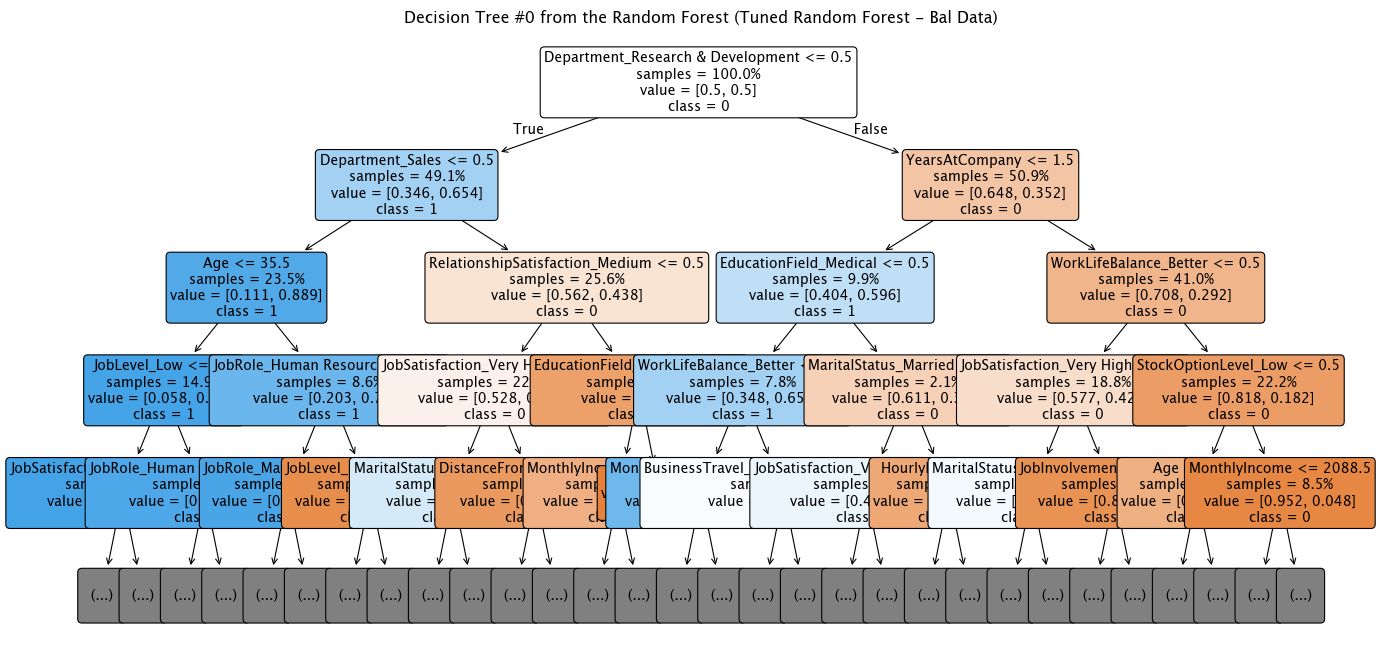

In [393]:
randomf_bal_tuned = RandomForestClassifier(**random_search.best_params_, random_state=0)


_ ,y_pred = evaluate_model(
    randomf_bal_tuned, 
    X_train_balanced, 
    y_train_balanced, 
    X_test, 
    y_test,
    save_path='images/figure 18.0.png', 
    model_name="Tuned Random Forest - Bal Data"
)

evaluate_model_with_cv(
    model=randomf_bal_tuned,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 18.1.png', 
    chart_name= "Tuned Random Forest - Bal Data"
)


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Tuned Random Forest - Bal Data",
    image_file='images/figure 18.2.png'
)


plot_top_features(
    randomf_bal_tuned, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 18.3.png', 
    model_name="Tuned Random Forest - Bal Data"
)

visualize_tree_from_forest(
    rf_model=randomf_bal_tuned,
    feature_names=X_train.columns,
    class_names=class_names,
    tree_index=0,      
    max_depth=4,       
    figsize=(16, 8), 
    save_path="images/figure 18.4.png", 
    model_name="Tuned Random Forest - Bal Data"
)

### Vanilla XGBOOST Model on the Original Data


In [403]:
xgboost_orig_vanilla = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


_ ,y_pred = evaluate_model(
    xgboost_orig_vanilla, 
    X_train, 
    y_train, 
    X_test, 
    y_test,
    save_path='images/figure 19.0.png', 
    model_name="Vanilla Xgboost - Orig Data"
)

evaluate_model_with_cv(
    model=xgboost_orig_vanilla,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 19.1.png', 
    chart_name= "Vanilla Xgboost - Orig Data"
)


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Vanilla Xgboost - Orig Data",
    image_file='images/figure 19.2.png'
)


plot_top_features(
    xgboost_orig_vanilla, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 19.3.png', 
    model_name="Vanilla Xgboost - Orig Data"
)

#visualize_tree_from_forest(
#    rf_model=xgboost_orig_vanilla,
#    feature_names=X_train.columns,
#    class_names=class_names,
#    tree_index=0,      # pick a tree (0 to n_estimators - 1)
#    max_depth=4,       # limits the depth for readability
#    figsize=(16, 8), save_path="figure 19.4.png", model_name="Vanilla Xgboost - Orig Data"
#)



### Hyperparameterization for XGBOOST Model on the Original Data


In [405]:
param_grid = {
    'n_estimators': np.arange(100, 1100, 100),             # Number of boosting rounds
    'max_depth': np.arange(3, 15, 2),                      # Maximum tree depth
    'learning_rate': np.linspace(0.01, 0.3, 10),           # Step size shrinkage
    'subsample': np.linspace(0.5, 1.0, 6),                 # % of training samples used per tree
    'colsample_bytree': np.linspace(0.5, 1.0, 6),          # % of features used per tree
    'gamma': np.linspace(0, 5, 11),                        # Minimum loss reduction to split
    'reg_alpha': np.logspace(-3, 1, 5),                    # L1 regularization
    'reg_lambda': np.logspace(-3, 1, 5),                   # L2 regularization
    'scale_pos_weight': [1, 2, 5, 10]                      # For class imbalance
}

xgb_clf = XGBClassifier(
    objective='binary:logistic',  # Change to 'multi:softprob' for multi-class
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=100,            # Tune based on compute time
    scoring='roc_auc',    # Or f1, roc_auc, etc.
    cv=5,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Tuned XGBoost Parameters: {}".format(random_search.best_params_))
print('Best cross-validation score: {:.4f}'.format(random_search.best_score_))

# Save all results
results = pd.DataFrame(random_search.cv_results_)
file_name = 'Hyperparameterization/Hyperparameter Search for XGBoost with Orig Data.csv'
results.to_csv(file_name, index=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:53:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:53:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:53:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:53:59] WARN

Tuned XGBoost Parameters: {'subsample': np.float64(0.5), 'scale_pos_weight': 2, 'reg_lambda': np.float64(10.0), 'reg_alpha': np.float64(1.0), 'n_estimators': np.int64(900), 'max_depth': np.int64(9), 'learning_rate': np.float64(0.1388888888888889), 'gamma': np.float64(4.0), 'colsample_bytree': np.float64(0.5)}
Best cross-validation score: 0.8113


### Tuned XGBoost model on the Original Data


In [406]:
xgboost_orig_tuned = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss',
    **random_search.best_params_ )


_ ,y_pred = evaluate_model(
    xgboost_orig_tuned, 
    X_train, 
    y_train, 
    X_test, 
    y_test,
    save_path='images/figure 20.0.png', 
    model_name="Vanilla Xgboost - Bal Data"
)

evaluate_model_with_cv(
    model=xgboost_orig_tuned,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 20.1.png', 
    chart_name= "Vanilla Xgboost - Bal Data"
    )


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Vanilla Xgboost - Bal Data",
    image_file='images/figure 20.2.png'
)


plot_top_features(
    xgboost_orig_tuned, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 20.3.png', 
    model_name="Vanilla Xgboost - Bal Data"
)

#visualize_tree_from_forest(
#    rf_model=xgboost_orig_vanilla,
#    feature_names=X_train.columns,
#    class_names=class_names,
#    tree_index=0,      # pick a tree (0 to n_estimators - 1)
#    max_depth=4,       # limits the depth for readability
#    figsize=(16, 8), save_path="figure 19.4.png", model_name="Vanilla Xgboost - Orig Data"
#)



### Vanilla XGBOOST Model on the Balanced Data


In [407]:
xgboost_bal_vanilla = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss')


_ ,y_pred = evaluate_model(
    xgboost_bal_vanilla, 
    X_train_balanced, 
    y_train_balanced, 
    X_test, 
    y_test,
    save_path='images/figure 20.0.png', 
    model_name="Vanilla Xgboost - Bal Data"
)

evaluate_model_with_cv(
    model=xgboost_bal_vanilla,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 20.1.png', 
    chart_name= "Vanilla Xgboost - Bal Data"
    )


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Vanilla Xgboost - Bal Data",
    image_file='images/figure 20.2.png'
)


plot_top_features(
    xgboost_bal_vanilla, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 20.3.png', 
    model_name="Vanilla Xgboost - Bal Data"
)

#visualize_tree_from_forest(
#    rf_model=xgboost_orig_vanilla,
#    feature_names=X_train.columns,
#    class_names=class_names,
#    tree_index=0,      # pick a tree (0 to n_estimators - 1)
#    max_depth=4,       # limits the depth for readability
#    figsize=(16, 8), save_path="figure 19.4.png", model_name="Vanilla Xgboost - Orig Data"
#)



In [408]:
param_grid = {
    'n_estimators': np.arange(100, 1100, 100),             # Number of boosting rounds
    'max_depth': np.arange(3, 15, 2),                      # Maximum tree depth
    'learning_rate': np.linspace(0.01, 0.3, 10),           # Step size shrinkage
    'subsample': np.linspace(0.5, 1.0, 6),                 # % of training samples used per tree
    'colsample_bytree': np.linspace(0.5, 1.0, 6),          # % of features used per tree
    'gamma': np.linspace(0, 5, 11),                        # Minimum loss reduction to split
    'reg_alpha': np.logspace(-3, 1, 5),                    # L1 regularization
    'reg_lambda': np.logspace(-3, 1, 5),                   # L2 regularization
    'scale_pos_weight': [1, 2, 5, 10]                      # For class imbalance
}

xgb_clf = XGBClassifier(
    objective='binary:logistic',  # Change to 'multi:softprob' for multi-class
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=100,            # Tune based on compute time
    scoring='roc_auc',    # Or f1, roc_auc, etc.
    cv=5,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_balanced, y_train_balanced)

print("Tuned XGBoost Parameters: {}".format(random_search.best_params_))
print('Best cross-validation score: {:.4f}'.format(random_search.best_score_))

# Save all results
results = pd.DataFrame(random_search.cv_results_)
file_name = 'Hyperparameterization/Hyperparameter Search for XGBoost with Bal Data.csv'
results.to_csv(file_name, index=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:41:57] WARN

Tuned XGBoost Parameters: {'subsample': np.float64(0.7), 'scale_pos_weight': 10, 'reg_lambda': np.float64(10.0), 'reg_alpha': np.float64(0.01), 'n_estimators': np.int64(800), 'max_depth': np.int64(7), 'learning_rate': np.float64(0.10666666666666666), 'gamma': np.float64(0.0), 'colsample_bytree': np.float64(0.9)}
Best cross-validation score: 0.9665


In [410]:
xgboost_bal_tuned = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    **random_search.best_params_)


_ ,y_pred = evaluate_model(
    xgboost_bal_tuned, 
    X_train_balanced, 
    y_train_balanced, 
    X_test, 
    y_test,
    save_path='images/figure 21.0.png', 
    model_name="Tuned Xgboost - Bal Data"
)

evaluate_model_with_cv(
    model=xgboost_bal_tuned,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='images/figure 21.1.png', 
    chart_name= "Tuned Xgboost - Bal Data"
)


plot_confusion_matrix(
    y_test,
    y_pred,
    display_labels=['Stayed', 'Churned'],
    title="Tuned Xgboost - Bal Data",
    image_file='images/figure 21.2.png'
)


plot_top_features(
    xgboost_bal_tuned, 
    feature_names=features.columns, 
    model_type='tree',
    save_path='images/figure 21.3.png', 
    model_name="Tuned Xgboost - Bal Data"
)

#visualize_tree_from_forest(
#    rf_model=xgboost_orig_vanilla,
#    feature_names=X_train.columns,
#    class_names=class_names,
#    tree_index=0,      # pick a tree (0 to n_estimators - 1)
#    max_depth=4,       # limits the depth for readability
#    figsize=(16, 8), save_path="figure 19.4.png", model_name="Vanilla Xgboost - Orig Data"
#)